# *Trabajo pŕactico organización de datos*

## 1.  Intoducción

Este trabajo consiste en realizar un análisis profundo sobre un determinado set de datos para de esta manera afianzar los contenídos vistos durante el curso. 
El trabajo se dividirá en diferentes secciones para facilitar su lectura y mantener un orden a la hora de sacar conclusiones.

## 2. Importación de librerías

En esta sección se importaran las librerías cuyas herramientas utilizaremos en el trancurso de todo el trabajo.

In [209]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos y primeras impresiones

### 3.1 Lectura de los datos

Se dispone de un archivo csv que nos brinda información sobre propiedades en venta en el país de Mexico. Cada línea del archivo nos da información sobre una de las propiedades. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluída en el archivo. Se tratará a los datos como un Dataframe.

In [210]:
df = pd.read_csv('train.csv')
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


### 3.2 Dimensiones del Dataframe

In [211]:
dimensiones= df.shape
print("Cantidad de filas:", dimensiones[0])
print("Cantidad de columnas:", dimensiones[1])
print("Tamaño del Dataframe:", df.size)

Cantidad de filas: 240000
Cantidad de columnas: 23
Tamaño del Dataframe: 5520000


### 3.3 Caracterísitcas principales del Dataframe

Se incluye una lista de todas las columnas con sus tipos de datos y el número de valores no nulos en cada columna. A su vez conocemos tambien los tipos de datos con los que estaremos trabjando.

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

## 3.4 Datos faltantes en el Dataframe


No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber cuántos de esos registros tienen información faltante

###  3.4.1 Datos faltantes por columna


#funciones a usar:

#funcion para conseguir los numeros de las filas que tienen el campo especificado en la columna con un NaN
#devuelve una lista con las posiciones
#para que funcione bien, tiene que usar la clave por default del dataFrame. si se usa una clave compuesta
#o una clave que no sea enteros crecientes falla

def obtener_filas_con_Nan(df, nombreColumna):
    serie=df.loc[:,nombreColumna]
    serie=serie.isnull()
    lista_posiciones_nulas=[]
    contador=0
    for booleano in serie:
        if booleano is True:
            lista_posiciones_nulas.append(contador)
        contador+=1
    return lista_posiciones_nulas


def concatenarListasSinDuplicados(lista1,lista2):
    dicc={}
    for item in lista1:
       
    
        dicc[item]=1
    return dicc.keys()


serie_nulos=df.isnull().any()
lista_nulos=list(df.columns)
df_muestra_de_info=pd.DataFrame(index=lista_nulos)
lista_aux=[]
for indice in range(0,len(lista_nulos)):
        if serie_nulos.iloc[indice]== True:
            lista_aux.append("Si")
        else:
            lista_aux.append("No")
df_muestra_de_info['Faltan datos']=lista_aux 
cantidad_de_nans=[]

for campo in lista_nulos:
    cantidad_de_nans.append(len(obtener_filas_con_Nan(df,campo)))

df_muestra_de_info['Cantidad']=cantidad_de_nans
df_muestra_de_info.head(23)


In [213]:
#o robado del tutorial
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
id,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
precio,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06


### 3.4.2 Cantidad de datos faltantes


In [214]:
cantidad_de_nulos=df.isnull().sum().sum()
print("Cantidad de Nans en el DataFrame: "+ str(cantidad_de_nulos))

Cantidad de Nans en el DataFrame: 535127


## 4. Análisis de Datos

En las secciones anteriores se realizó la carga de los datos y se obtubo información general del Dataframe de manera tal de familiarizarnos con la información con la que se estará trabajando durante el trabajo práctico. A partir de ahora se comenzará con el análisis de dichos datos donde iremos explorando el Dataframe para obtener resultados que nos permitan sacar conclusiones sobre la venta de propiedades en México.

### 4.1 Cantidad de propiedades:

Es interesante conocer la cantidad de propiedades de la que disponemos. Como cada fila del Dataframe se corresponde con una propiedad, la cantidad de propiedades se corresponde con la cantidad de filas del dataframe:

In [215]:
print("Cantidad de propiedades:", dimensiones[0])

Cantidad de propiedades: 240000


### 4.2 Tipo de propiedades:

Las propiedades en venta pueden ser de diferentes tipos. A continuación se muestran cuales son los tipo de propiedadas con los que estaremos trabajando como tambien la cantidad de propiedades en venta de cada uno de ellos.

In [216]:
df['tipodepropiedad'].value_counts() 

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

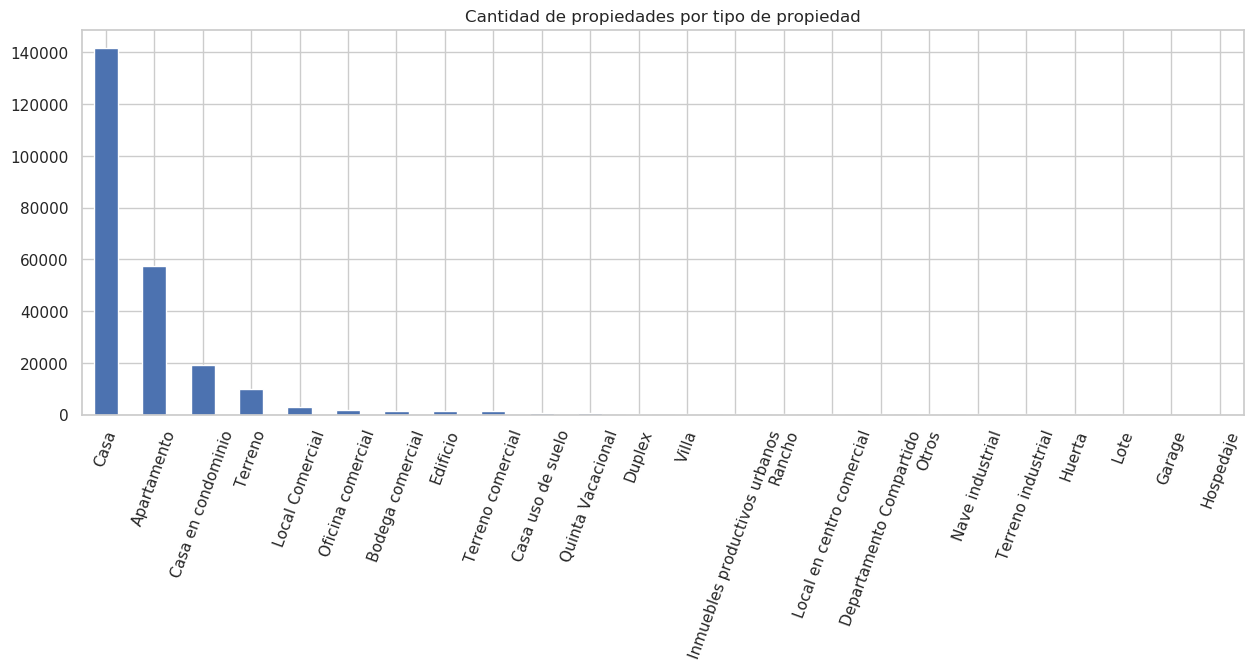

In [217]:
#print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Cantidad de propiedades por tipo de propiedad");
#roba3 del tutorial, no cuenta

## 4.3 Ubicación de las propiedades

### 4.3.1 Cantidad de propiedades por provincia

Vimos que el set de datos se corresponde a propiedades en venta distribuídas en el país de México. Este país divide en provincias. Veamos cuantas propiedades hay por cada provincia:

In [218]:
df.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

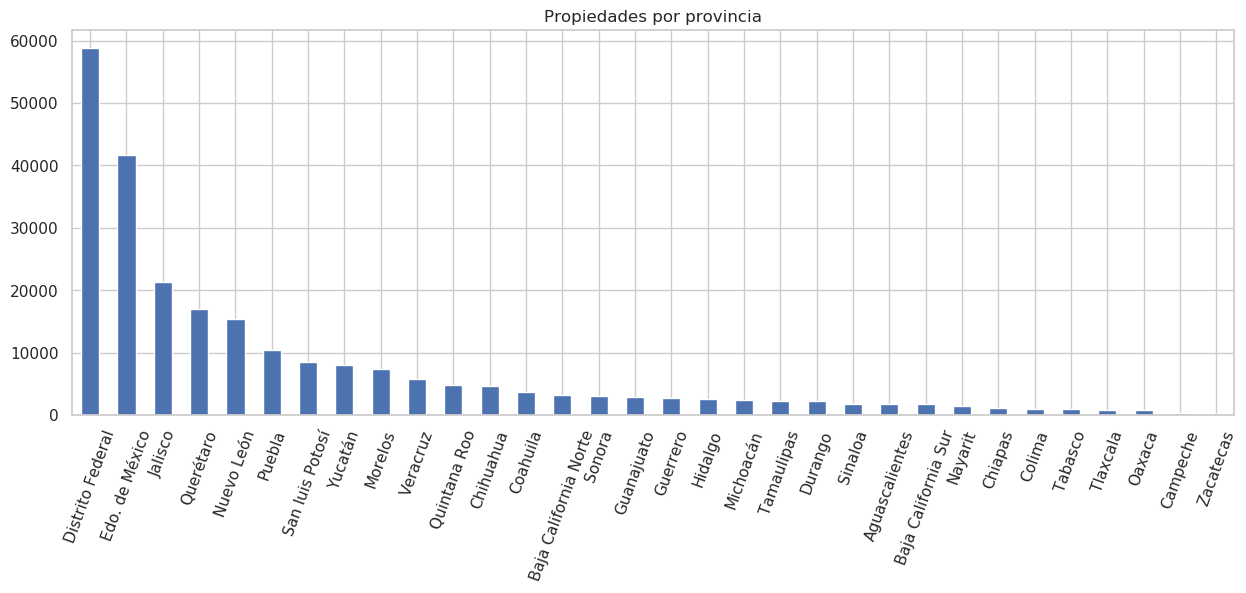

In [219]:
#print(f"Total de provincias: {df.provincia.nunique()}")
df.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");
#robado parte 2

### 4.3.2 Cantidad de propiedades en venta por ciudad

Las provincias se dividen en ciudades. Veamos para cada provincia cuantas propiedades en venta hay en cada ciudad.

In [220]:
grouped = df.groupby(['provincia','ciudad'])['ciudad'].agg(['size'])
grouped.columns = ['Propiedades por ciudad']
grouped

Propiedades por ciudad
provincia             ciudad                                           
Aguascalientes        Aguascalientes                               1451
                      Asientos                                        5
                      Calvillo                                        3
                      Cosío                                           3
                      El Llano                                        3
                      Jesús María                                   267
                      Pabellón de Arteaga                             4
                      Rincón de Romos                                 3
                      San Francisco de los Romo                      11
                      Tepezalá                                        3
Baja California Norte Ensenada                                       83
                      Mexicali                                      236
                      Playas de Rosarito                             21
                      Tecate                                         17
                      Tijuana                                      2863
Baja California Sur   Comondú                                         6
                      La Paz                                        930
                      Loreto                                          4
                      Los Cabos                                     759
                      Mulegé                                          1
Campeche              Calkiní                                         3
                      Campeche                                      147
                      Carmen                                        107
                      Champotón                                       3
                      Escárcega                                       1
                      Hopelchén                                       1
                      Palizada                                        1
Chiapas               Bella Vista                                     1
                      Berriozábal                                    16
                      Chiapa de Corzo                                14
...                                                                 ...
Yucatán               Suma                                            1
                      Tahmek                                          1
                      Teabo                                           1
                      Tekax                                           2
                      Telchac Pueblo                                  6
                      Telchac Puerto                                 65
                      Temax                                           1
                      Temozón                                        21
                      Timucuy                                         1
                      Tinum                                           1
                      Tizimín                                        10
                      Tzucacab                                        1
                      Uayma                                           1
                      Ucú                                             1
                      Umán                                           11
                      Valladolid                                      9
                      Yaxcabá                                         1
                      Yaxkukul                                        1
                      Yobaín                                          5
Zacatecas             Calera                                          3
                      Fresnillo                                       1
                      Guadalupe                                      40
                      Jerez                                           5
                 

In [221]:
#grafico?

### 4.3.3 ¿Cuáles son las provincias con mayor cantidad de algún tipo de propiedad?

Es interesante conocer cuales son las provincias que tiene mayor cantidad de propiedades de algún tipo en específico en venta. A modo de ejemplo veamos el top 3 de las provincias con mayor cantidad de casas en venta.

In [222]:
print(" Las 3 provincias con mayor cantidad de casas en venta son: ")
df.loc[df.tipodepropiedad == "Casa", : ]["provincia"].value_counts().head(3)

 Las 3 provincias con mayor cantidad de casas en venta son: 


Edo. de México      25938
Distrito Federal    15812
Jalisco             14196
Name: provincia, dtype: int64

Otro ejemplo podría ser conocer cual es la provincia con mayor cantidad de huertas en venta.

In [223]:
print(" La provincia con mayor cantidad de Huertas en venta es:")
df.loc[df.tipodepropiedad == "Huerta", :]["provincia"].value_counts().head(1)

 La provincia con mayor cantidad de Huertas en venta es:


Chihuahua    7
Name: provincia, dtype: int64

Supongamos ahora que queremos generalizarlo y calculemos para cada tipo de propiedad cuál es la provincia que tiene mayor cantidad de propiedades en venta de cada tipo.

In [224]:
tipos = df["tipodepropiedad"].dropna().unique()
for tipo in tipos:
    print ("\nTIPO: " + tipo)
    print(df.loc[df.tipodepropiedad == tipo, :]["provincia"].value_counts().head(1))
    
#dfaux = df.groupby(['tipodepropiedad','provincia'])\
#    .agg({ 'tipodepropiedad':'size'}) #necesito averiguar como quedarme con 
                                       #el mayor de cada zona y ya está
#dfaux


TIPO: Apartamento
Distrito Federal    33839
Name: provincia, dtype: int64

TIPO: Casa en condominio
Edo. de México    4717
Name: provincia, dtype: int64

TIPO: Casa
Edo. de México    25938
Name: provincia, dtype: int64

TIPO: Terreno
Distrito Federal    1677
Name: provincia, dtype: int64

TIPO: Terreno comercial
San luis Potosí    234
Name: provincia, dtype: int64

TIPO: Local Comercial
Distrito Federal    471
Name: provincia, dtype: int64

TIPO: Quinta Vacacional
Nuevo León    205
Name: provincia, dtype: int64

TIPO: Oficina comercial
Distrito Federal    736
Name: provincia, dtype: int64

TIPO: Edificio
Distrito Federal    616
Name: provincia, dtype: int64

TIPO: Casa uso de suelo
Distrito Federal    277
Name: provincia, dtype: int64

TIPO: Local en centro comercial
Jalisco    54
Name: provincia, dtype: int64

TIPO: Bodega comercial
Distrito Federal    322
Name: provincia, dtype: int64

TIPO: Otros
Querétaro    34
Name: provincia, dtype: int64

TIPO: Villa
Guerrero    90
Name: provin

### 4.3.4 Antiguedad de propiedades segun provincia

Queremos ver que provincia tiene en promedio las propiedades más antiguas.

In [225]:
antiguedad_por_zona = df.groupby('provincia')['antiguedad'].agg(['size','sum','mean']).round(2)
antiguedad_por_zona.columns = ['cantidad de propiedades', 'suma de las antiguedades (años)', 'antiguedad promedio(años)']
antiguedad_por_zona.sort_values('antiguedad promedio(años)', ascending = False)

,cantidad de propiedades,suma de las antiguedades (años),antiguedad promedio(años)
provincia,,,
Distrito Federal,58790,"630,800.00",12.19
Edo. de México,41607,"376,249.00",10.03
Guerrero,2678,"18,284.00",7.61
Nuevo León,15324,"85,133.00",7.54
Aguascalientes,1753,"11,633.00",7.52
Michoacán,2471,"12,343.00",7.06
Jalisco,21238,"119,008.00",6.64
Chihuahua,4590,"18,805.00",6.52
Morelos,7337,"37,963.00",6.46


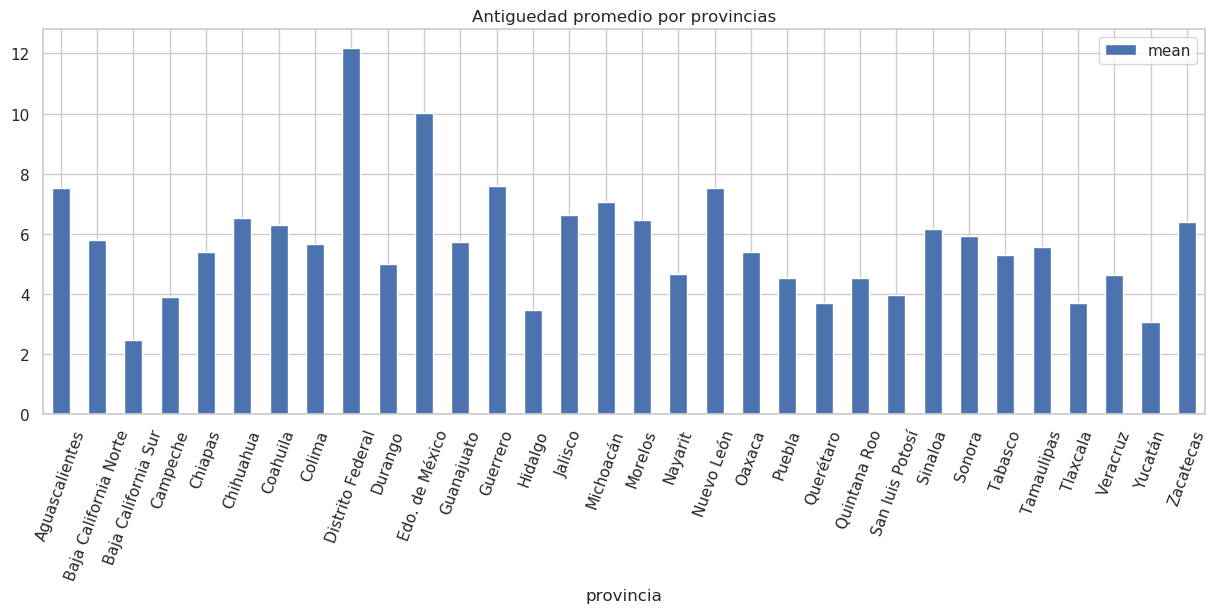

In [226]:
dfaux = df.groupby('provincia')['antiguedad'].agg(['mean'])
dfaux.plot(kind = 'bar', figsize = (15, 5), rot = 70, title = "Antiguedad promedio por provincias"); 

### 4.3.5 Metros por provincia

Ahora analizaremos cuales son las provincias cuyas propiedades tienen en promedio mas metros.

In [227]:
tamanio_por_zona = df.groupby('provincia').agg({'metrostotales': ['size', 'sum', 'mean']})
tamanio_por_zona.columns = ['cantidad de propiedades', 'metros totales','promedio']
tamanio_por_zona.sort_values('promedio', ascending=False)

,cantidad de propiedades,metros totales,promedio
provincia,,,
Yucatán,7928,"1,530,094.00",261.06
Chihuahua,4590,"855,017.00",213.81
Morelos,7337,"988,582.00",209.62
Coahuila,3695,"682,032.00",208.89
Campeche,263,"46,865.00",204.65
Sonora,2988,"527,249.00",196.22
Querétaro,16988,"2,824,860.00",193.44
Quintana Roo,4756,"667,887.00",189.26
Durango,2275,"389,575.00",184.11


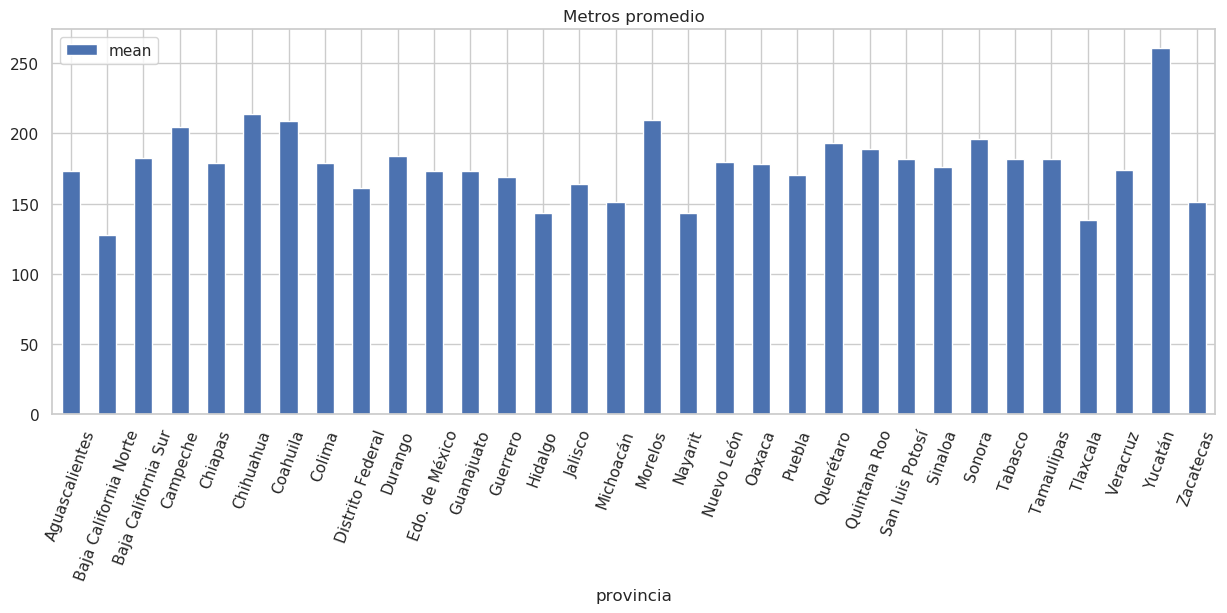

In [228]:
dfaux = df.groupby('provincia')['metrostotales'].agg(['mean'])
dfaux.plot(kind = 'bar', figsize = (15, 5), rot = 70, title = "Metros promedio");

## 4.4 Análisis de precios

En esta sección se analizará como afectan al precio de las propiedades diferentes factores. El precio de una propiedad puede variar dependiendo la ubicación, los metros que ocupa, la cantidad de habitaciones, si tiene o no piscina, etc.

### 4.4.1 Precio de propiedades según provincia

En primer lugar veremos cuanto afecta al valor de una propiedad su ubicación, para ello analizaremos el precio promedio de las propiedades segun la provincia en la que se ubican.

In [229]:
precios_promedio = df.groupby('provincia')['precio'].agg(['mean','size'])
precios_promedio.columns = ['Precio_promedio','cant de propiedades']
precios_promedio.sort_values('Precio_promedio', ascending=False)

,Precio_promedio,cant de propiedades
provincia,,
Distrito Federal,"3,471,705.09",58790
Edo. de México,"2,762,464.91",41607
Nuevo León,"2,717,757.65",15324
Guerrero,"2,548,741.86",2678
Quintana Roo,"2,402,966.94",4756
Jalisco,"2,367,693.58",21238
Tabasco,"2,300,480.23",994
Puebla,"2,298,403.64",10421
Morelos,"2,290,088.01",7337


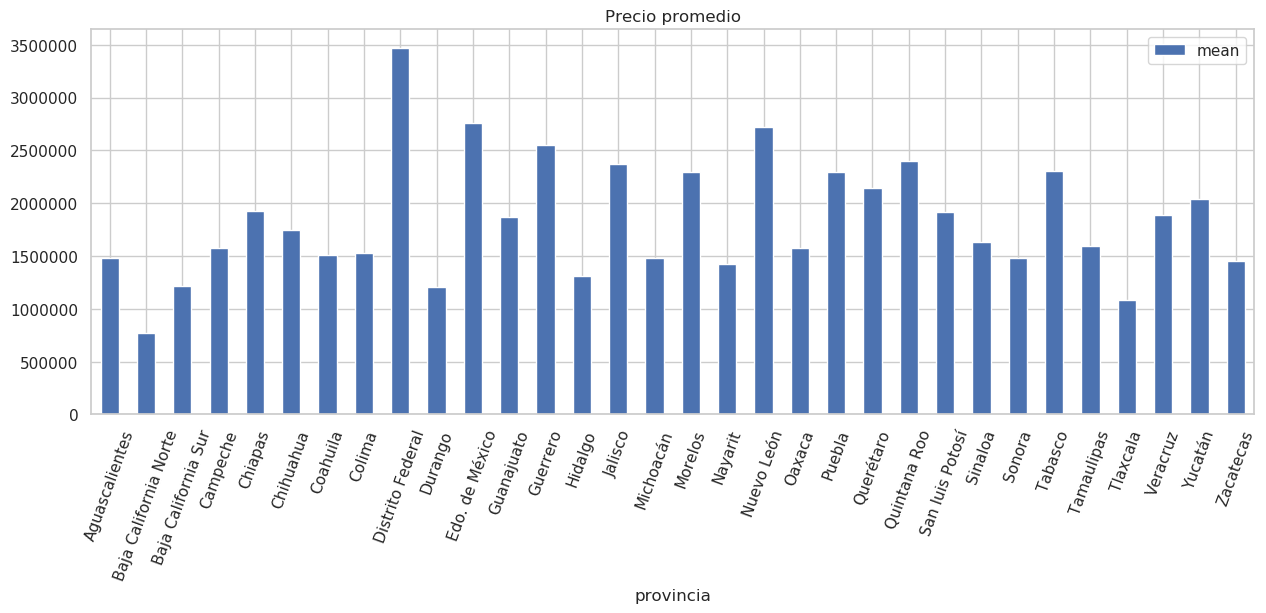

In [230]:
dfaux = df.groupby('provincia')['precio'].agg(['mean'])
dfaux.plot(kind = 'bar', figsize = (15, 5), rot = 70, title = "Precio promedio");

## 4.4.2 Variación del precio según cantidad de habitaciones

Un factor decisivo que influye sobre el precio de las propiedades es la cantidad de las habitaciones de las que dispone. En este apartado se sacarán conclusiones sobre la influencia de este factor en los precios de las propiedades.
Para que el análisis sea eficiente se considerarán propiedades donde el resto de las caracteristicas sea similar.

Por ejemplo: Consideremos solo las casas a estrenar ubicadas en Distrito Federal con un solo garage y sin piscina. Tanto la ubicacion de las propiedades como si tiene o no garage o piscina son factores que podrían influir en el precio de la misma, por este motivo se buscan propiedades donde estos factores no varien demasiado.

In [231]:
df_resultados= df.loc[df.provincia == 'Distrito Federal',:]\
.loc[df.tipodepropiedad == 'Casa',:].loc[df.garages == 1].loc[df.antiguedad == 0]\
.loc[df.piscina==0].groupby('habitaciones')['precio'].agg(['size','mean'])

df_resultados.columns = ['cantidad_de_propiedades','precio_promedio']
df_resultados = df_resultados.loc[df_resultados.cantidad_de_propiedades > 5]
df_resultados.sort_values('precio_promedio', ascending=False)

#deberiamos poner la condicion de que haya un minimo de 5 muestras para que evitar la formula más peligrosa
#del mundo (5 por decir un numero)

,cantidad_de_propiedades,precio_promedio
habitaciones,,
4.00,13,"3,922,938.46"
3.00,46,"1,805,524.35"
2.00,29,"1,313,944.93"
1.00,7,"1,307,142.86"


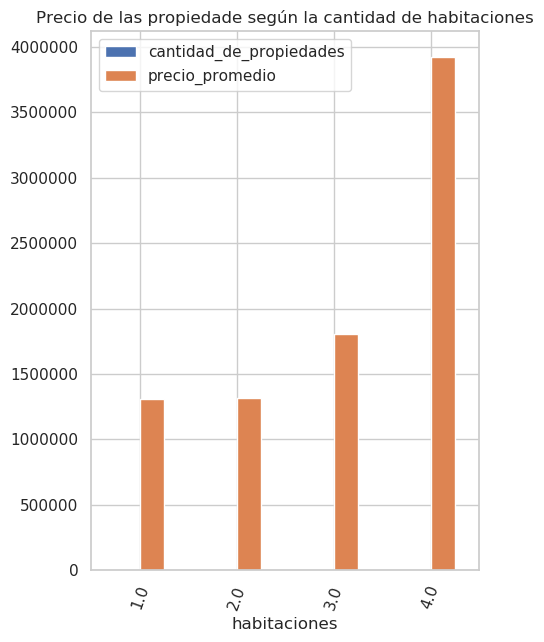

In [232]:
df_resultados.plot(kind ='bar', figsize = (5, 7), rot = 70, title = "Precio de las propiedade según la cantidad de habitaciones");

### 4.4.3 El impacto de las piscinas en el precio 

Otro de los factores determinantes a la hora de comprar una propiedad es si esta tiene o no piscina. Consideremos una ciudades mas calurosas de Mexico como lo es 'Baja California'. Tomemos casas para una familia tipo, dos habitaciones y un garage con una antiguedad menor a 5 años. Para estas propiedades calculemos el promedio de precios distinguiendo si las casas tienen o no piscina.

In [233]:
df_aux= df.loc[df.provincia == 'Baja California Sur'].loc[df.tipodepropiedad == 'Casa']\
.loc[df.antiguedad <= 5].loc[df.habitaciones == 2].loc[df.garages==1]

df_precios_promedio= df_aux.groupby('piscina')['precio'].agg(['mean','size'])   
df_precios_promedio.columns=['precio_promedio','cantidad_de_propiedades']
df_precios_promedio

#Dario, nos has timado(?)

,precio_promedio,cantidad_de_propiedades
piscina,,
0.00,"571,790.59",120
1.00,"950,000.00",1


**OBS:** se puede observar el gran impacto en el precio que tienen las piscinas ya que para propiedades de similares caracteristicas el precio promedio con piscina es ampliamente superior al precio promedio sin ellas.
 

In [234]:
df_aux= df.loc[(df.tipodepropiedad == 'Casa') ]\
.loc[df.antiguedad <= 5].loc[df.habitaciones == 2].loc[df.garages == 1]

df_precios_promedio= df_aux.groupby('piscina')['precio'].agg(['mean','size'])   
df_precios_promedio.columns=['precio promedio','cantidad de propiedades']
df_precios_promedio
#eliminando la ubicacion, tambien se nota un cambio en el precio pero bue

,precio promedio,cantidad de propiedades
piscina,,
0.00,"618,614.63",6252
1.00,"826,314.73",248


### 4.4.4  El impacto de poseer garage en el precio

Otro factor que influye sobre el precio es si la propiedad posee o no garage. En éste apartado se analizará la variación del precio de la propiedad con garage respecto a si no lo posee. Se asume que el precio de una propiedad con garage es mayor que la misma si no lo tuviera


En apartados anteriores se analizó el impacto de la ubicación de la propiedad y la cantidad de habitaciones en el precio de la propiedad. Para ampliar ésta información, el análisis de los cambios en el precio se realizarán en las propiedades agrupadas segun la provincia en la que se encuentran y en la cantidad de habitaciones que poseen

Puede ocurrir que para un determinado numero de habitaciones en una determinada ciudad, no haya informacion sobre propiedades con garage pero si las hay para propiedades sin garage, y viceversa. En tales casos la información mostrada reflejará esta situación, mostrando una variación en el precio de la propiedad de 0%.

In [235]:
df_garages = df.groupby(['provincia','habitaciones','garages']).agg({'precio':'mean'})
df_garages

precio
provincia             habitaciones garages                     
Aguascalientes         1.00        0.00            2,183,333.33
                                   1.00              807,903.83
                                   2.00              845,000.00
                       2.00        0.00              651,164.44
                                   1.00              550,286.23
                                   2.00            1,114,546.32
                                   3.00            2,677,500.00
                       3.00        0.00            1,237,666.67
                                   1.00              814,883.91
                                   2.00            1,622,368.79
                                   3.00            2,205,781.71
                       4.00        0.00            1,238,071.43
                                   1.00              998,877.55
                                   2.00            1,654,963.34
                                   3.00            2,499,793.10
                       5.00        0.00            1,599,857.14
                                   1.00              999,376.92
                                   2.00            2,466,071.43
                                   3.00            3,039,833.33
                       6.00        0.00            1,200,000.00
                                   1.00            1,499,333.22
                                   2.00            2,142,000.00
                                   3.00              950,000.00
                       7.00        3.00            1,800,000.00
                       8.00        0.00            4,399,999.00
                                   1.00            1,083,333.33
                       9.00        0.00            2,260,000.00
Baja California Norte  1.00        0.00              523,333.33
                                   1.00              584,343.75
                                   2.00              472,714.29
...                                                         ...
Yucatán                4.00        1.00            1,329,923.08
                                   2.00            2,433,824.93
                                   3.00            3,185,544.00
                       5.00        0.00            2,577,142.86
                                   1.00            1,008,571.43
                                   2.00            2,233,564.10
                                   3.00            2,799,275.00
                       6.00        0.00            1,709,687.50
                                   2.00            2,042,123.33
                                   3.00            3,514,285.71
                       7.00        3.00            2,800,000.00
                       8.00        0.00            4,000,000.00
                                   1.00            3,800,000.00
                                   2.00            3,500,000.00
                       9.00        1.00            1,800,000.00
Zacatecas              1.00        1.00              340,000.00
                       2.00        0.00              673,750.00
                                   1.00              442,818.18
                                   2.00              441,333.33
                       3.00        0.00            1,043,333.33
                                   1.00              914,409.09
                                   2.00            1,878,770.93
                       4.00        0.00            1,785,000.00
                                   2.00            2,166,666.67
                                   3.00            2,325,000.00
                       5.00        1.00            2,475,000.00
                                   2.00            1,300,000.00
                                   3.00              800,000.00
                       6.00        1.00              400,000.00
                      10.00        0.00            1,500,000.00

[934 rows x 1 columns]

In [236]:
df_garages=df.groupby(['provincia','habitaciones','garages']).agg({'precio':'mean'})
#esta hecha asi, a mano, porque no hay una implementacion para hacer join con multiindices

indicesProvincias=df_garages.index.get_level_values(0)
dicc={}

for provincia in indicesProvincias:
    df_garages_habitaciones=df_garages.loc[provincia]
    indicesHabitaciones=df_garages_habitaciones.index.get_level_values(0)
    for habitaciones in indicesHabitaciones:
        df_garages_garages=df_garages_habitaciones.loc[habitaciones]
        indicesGarages=df_garages_garages.index.values
        lista_precios=[]
        lista_indices_garages=[]
        for garages in indicesGarages:
            lista_precios.append(df_garages_garages.loc[garages])
            lista_indices_garages.append(garages)
        cantidadDeGarages=len(lista_precios)
        
        if cantidadDeGarages==1:
            dicc[(provincia,habitaciones,lista_indices_garages[0])]=0
        else:
            valorBase=float(lista_precios[0])
                                         #este va a ser el valor que uso para comparar. Por como esta ordenado el df
                                         #va a ser el valor correspondiente a la menor cantidad de garages en la combinacion
                                         #provincia,habitacion
            for x in range(1,cantidadDeGarages):
                valorAComparar=float(lista_precios[x])
                diferencia=float(abs(valorAComparar-valorBase))
                porcentajeVariacion=round(float((diferencia/valorBase)*100),2)
                dicc[(provincia,habitaciones,lista_indices_garages[x])]=porcentajeVariacion


In [237]:
df_muestra=pd.DataFrame(list(dicc.items()))
df_muestra.columns=['Provincia,habitaciones,garages','Variación del precio por garage en %']
df_muestra=df_muestra[df_muestra.loc[:,'Variación del precio por garage en %']!=0]

lista1=[]
lista2=[]
lista3=[]
lista4=[]
for provincia,habitaciones,garages in df_muestra.loc[:,'Provincia,habitaciones,garages']:
    lista1.append(provincia)
    lista2.append(habitaciones)
    lista3.append(garages)
for variacion in df_muestra.loc[:,'Variación del precio por garage en %']:
    lista4.append(variacion)
df_muestra=pd.DataFrame(list(zip(lista1,lista2,lista3,lista4)),columns=['Provincia','habitaciones','garages','Variación del precio por garage en %'])

df_muestra

,Provincia,habitaciones,garages,Variación del precio por garage en %
0,Aguascalientes,1.00,1.00,63.00
1,Aguascalientes,1.00,2.00,61.30
2,Aguascalientes,2.00,1.00,15.49
3,Aguascalientes,2.00,2.00,71.16
4,Aguascalientes,2.00,3.00,311.19
5,Aguascalientes,3.00,1.00,34.16
6,Aguascalientes,3.00,2.00,31.08
7,Aguascalientes,3.00,3.00,78.22
8,Aguascalientes,4.00,1.00,19.32
9,Aguascalientes,4.00,2.00,33.67


Ahora que tengo la variación del valor de la propiedad, en base a la cantidad de garages, comparando elementos que se encuentran en la misma provincia y con la misma cantidad de habitaciones, revisamos de cuanto es el aumento para la misma cantidad de garages 


In [238]:
lista_cant_garages=list(df_muestra.loc[:,'garages'].value_counts().index)
lista_cant_garages.sort()

listaPromedios=[]

for x in range(0,len(lista_cant_garages)):
    serieAuxiliar=df_muestra[df_muestra.loc[:,'garages']==lista_cant_garages[x]]
    serieAuxiliar=serieAuxiliar.loc[:,'Variación del precio por garage en %']
    promedio=round(float(serieAuxiliar.apply('mean')))
    listaPromedios.append((lista_cant_garages[x],promedio))

df_resultado=pd.DataFrame(listaPromedios)
df_resultado.columns=['cantidad de garages','Variacion del precio por garage en %']
df_resultado

,cantidad de garages,Variacion del precio por garage en %
0,1.00,38
1,2.00,54
2,3.00,73


In [239]:
#aca se podria hacer una recta como gráfico. Hay 3 puntos que representan la variacion del precio de la propiedad 
#segun la cantidad de garages que posean comparado con una propiedad con caracteristicas similares pero sin garage

### 4.4.5 Como afectan los usos múltiples de la propiedad al precio

### Efecto de usos multiples sobre el precio de propiedades de características similares

Queremos ver el efecto de si la propiedad tiene usos multiples en comparación con su precio, para propiedades de características similares. Para ello, se fija la propiedad y la cantidad de habitaciones, y se compara el promedio de los valores de ambos grupos (con uso multiple y sin uso multiple). Puede ocurrir que para alguna combinación de cantidad de habitaciones con ubicación, no se dispongan de datos suficientes para realizar la comparación. En tal caso la información obtenida reflejará esta situación, mostrando una variación del 0%


In [240]:
df_variacion_precio_usos=df.groupby(['provincia','habitaciones','usosmultiples']).agg({'precio':'mean'})
df_variacion_precio_usos.index
indices_provincia=df_variacion_precio_usos.index.get_level_values(0)

#lo siguiente lo hice a mano, porque no esta implementada una forma de hacer join con multiindices en pandas

dicc={}

#consigo todas las provincias que se tienen que recorrer
indicesProvincias=df_variacion_precio_usos.index.get_level_values(0)
#recorro las provincias
for provincia in indicesProvincias:
    serieDentroDeProvincia=df_variacion_precio_usos.loc[provincia]
    indices_habitaciones=serieDentroDeProvincia.index.get_level_values(0)
    #recorro las habitaciones dentro de un grupo provincia específico
    for habitaciones in indices_habitaciones:
        serieDentroDeHabitaciones=serieDentroDeProvincia.loc[habitaciones]
        indices_usosMultiples=serieDentroDeHabitaciones.index.values
        lista_precios=[]
        for usosMultiples in indices_usosMultiples:
            lista_precios.append(serieDentroDeHabitaciones.loc[usosMultiples])
            
        #ahora que tengo todos los precios comparo 
        #si la longitud de la lista es igual a 1, significa que solamente habia un solo dato
        #para esas características
        
        if len(lista_precios)==1:
            dicc[(provincia,habitaciones)]=0
        else:
            #la comparación se hace respecto al precio sin uso multiple
            precioSinUso=float(lista_precios[0])
            precioConUso=float(lista_precios[1])
            diferencia=float(abs(precioSinUso-precioConUso))
            porcentajeVariacion=round(((diferencia/precioSinUso)*100),2)
            dicc[(provincia,habitaciones)]=porcentajeVariacion

            
#y ahora queda mostrar la info:
df_muestra=pd.DataFrame(list(dicc.items()))
df_muestra.columns=['Provincia,cantidad de habitaciones','variacion en %']
df_muestra

,"Provincia,cantidad de habitaciones",variacion en %
0,"(Aguascalientes, 1.0)",0.00
1,"(Aguascalientes, 2.0)",130.47
2,"(Aguascalientes, 3.0)",31.39
3,"(Aguascalientes, 4.0)",51.79
4,"(Aguascalientes, 5.0)",142.79
5,"(Aguascalientes, 6.0)",0.00
6,"(Aguascalientes, 7.0)",0.00
7,"(Aguascalientes, 8.0)",0.00
8,"(Aguascalientes, 9.0)",0.00
9,"(Baja California Norte, 1.0)",0.00


In [241]:
#se lo pone más bonito
df_muestra.columns=['provincia, habitaciones','variacion precio en %']
#sacamos los ceros, porque no nos aportan informacion para el promedio
df_muestra=df_muestra[df_muestra.loc[:,'variacion precio en %']!=0]
variacion=round(float(df_muestra.apply('mean')),2)
print("Hay una variación promedio de : "+ str(variacion)+"%")

Hay una variación promedio de : 56.4%


Entonces se puede concluir que, en condiciones iguales de ubicación y cantidad de habitaciones, el que una propiedad tenga usos múltiples se traduce en una variación del precio de la misma de un 56,4% respecto de si no tuviera usos múltiples

In [242]:
#grafico

### 4.4.6 Precio de la propiedad segun según su antiguedad


Nos interesa saber como se ve afectado el precio de la propiedad basado en la antiguedad de la misma.

Caso 1: Análisis del valor de la propiedad según la antiguedad de la misma.

In [243]:
df_propiedades_antiguedad=df.groupby('antiguedad')['precio'].agg(['mean','size'])
df_propiedades_antiguedad

,mean,size
antiguedad,,
0.00,"2,478,478.97",50335
1.00,"2,635,362.52",12353
2.00,"2,790,816.37",5059
3.00,"2,616,412.59",5616
4.00,"2,562,077.38",7944
5.00,"2,374,731.74",33268
6.00,"2,214,881.99",3169
7.00,"2,141,595.38",2046
8.00,"2,050,722.53",2418


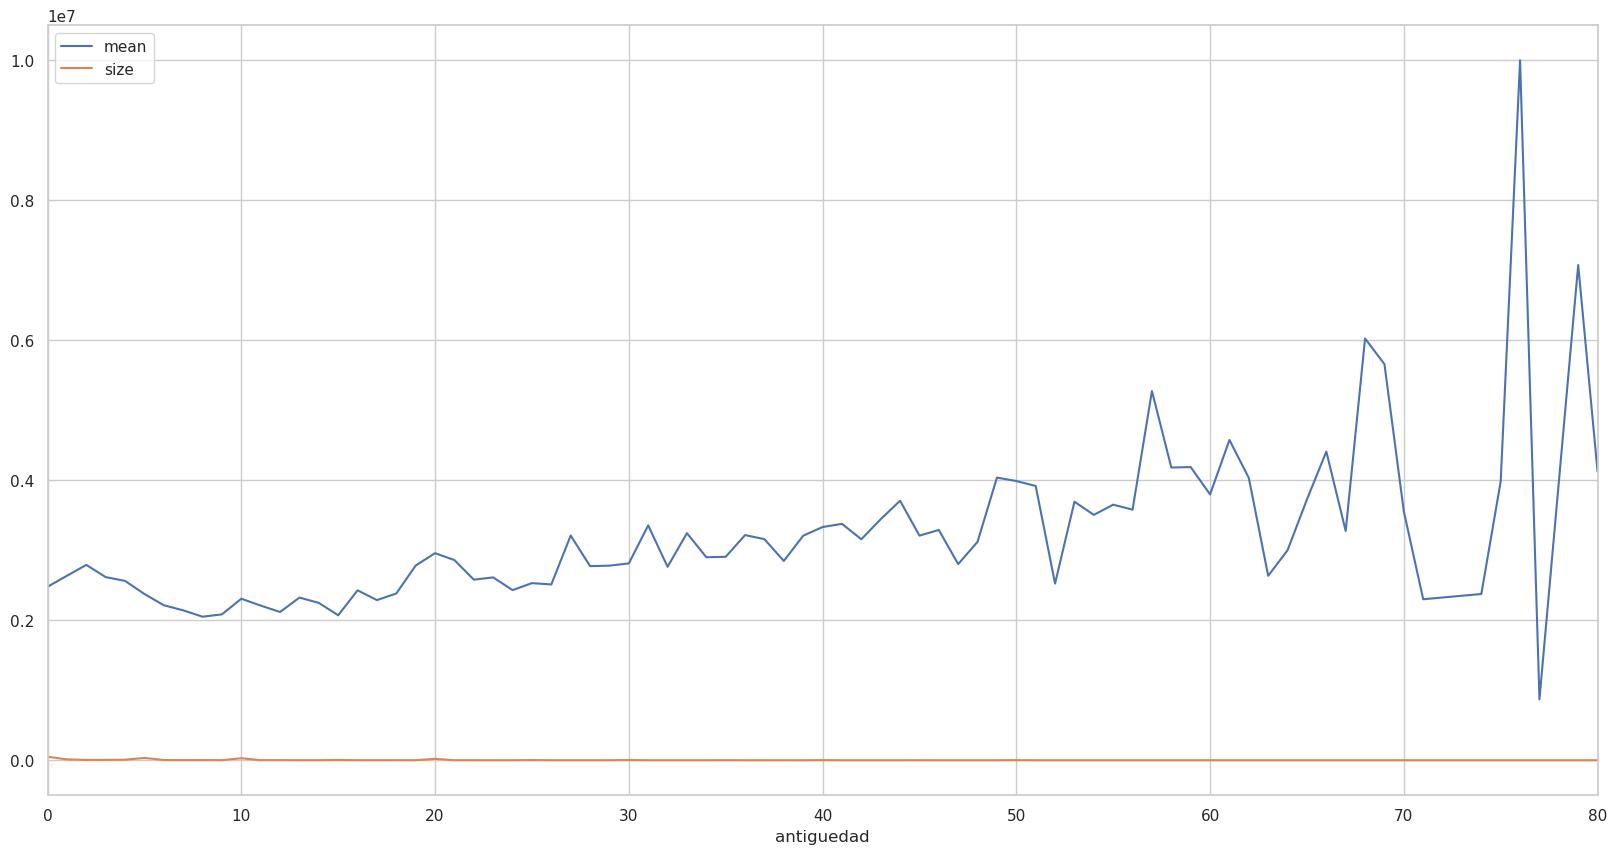

In [244]:
df_propiedades_antiguedad.plot()

Este gráfico toma en cuenta sólo la antiguedad de la propiedad, por lo que no puede sacarse conclusiones concretas sobre la relación de la propiedad y su antiguedad

Caso 2: Análisis del valor de la propiedad en función de la propiedad para propiedades con una cierta cantidad de habitaciones


In [245]:
df_antiguedad_habitaciones=df.groupby(['habitaciones','antiguedad'])['precio'].agg(['mean','size'])
df_antiguedad_habitaciones

mean  size
habitaciones antiguedad                           
 1.00         0.00              2,043,046.07   917
              1.00              2,303,176.41   354
              2.00              2,109,800.68   148
              3.00              1,949,372.11   152
              4.00              2,055,111.89   192
              5.00              1,680,227.53   737
              6.00              1,580,465.95    61
              7.00              1,523,029.41    34
              8.00              1,533,400.00    35
              9.00                851,315.79    19
             10.00              1,265,823.08   446
             11.00              1,285,384.62    26
             12.00              1,409,271.43    14
             13.00              1,536,966.67     3
             14.00              1,626,000.00     5
             15.00              1,260,219.18    73
             16.00              1,122,857.14     7
             17.00              1,250,000.00     6
             18.00                948,181.82    11
             20.00              1,531,171.39   363
             21.00              1,395,666.67     9
             22.00              1,453,750.00     8
             23.00              1,054,557.17     6
             24.00                638,750.00     4
             25.00              1,321,413.79    29
             26.00              1,197,142.86     7
             27.00                713,500.00     2
             28.00                590,000.00     2
             29.00                933,333.33     3
             30.00              1,538,393.64    59
...                                      ...   ...
10.00         1.00              4,725,000.00     4
              2.00              4,780,000.00     1
              3.00              3,950,000.00     8
              4.00              3,945,666.67    12
              5.00              4,598,930.87    46
              6.00              2,690,000.00     2
              7.00              3,350,000.00     1
              8.00              7,200,000.00     2
              9.00              5,425,000.00     2
             10.00              4,392,118.64    59
             11.00              1,298,000.00     1
             13.00                380,000.00     1
             14.00              2,750,000.00     1
             15.00              3,891,250.00     8
             17.00                850,000.00     1
             20.00              4,628,860.64    94
             21.00              3,950,000.00     1
             22.00              3,850,000.00     1
             25.00              1,370,000.00     2
             27.00              1,995,000.00     1
             28.00              3,560,000.00     3
             30.00              5,825,000.00     4
             31.00              5,000,000.00     1
             32.00              1,650,000.00     2
             35.00              2,300,000.00     1
             40.00              5,398,333.33     6
             45.00              7,500,000.00     1
             50.00              6,398,566.05    20
             69.00              8,200,000.00     1
             80.00              4,500,000.00     1

[508 rows x 2 columns]

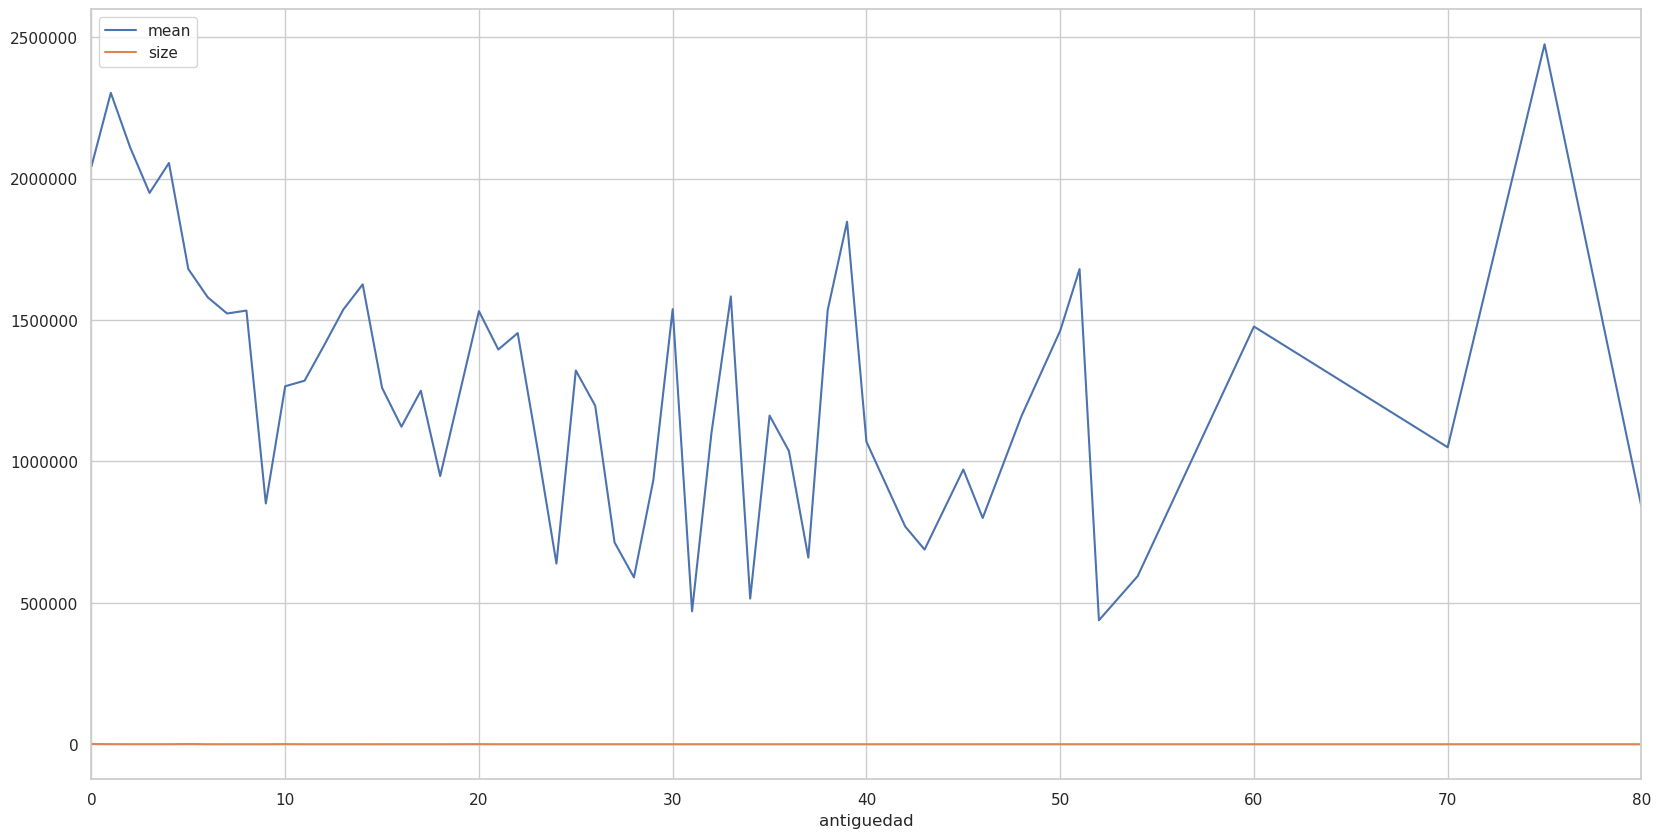

In [246]:
serie_1_habitacion=df_antiguedad_habitaciones.loc[1.00,:]
serie_1_habitacion.plot()

### 4.4.7 ¿Es influyente la cercanía a centros comerciales en el precio de la propiedad?

Dentro de una misma ciudad las propiedades pueden ubicarse en diferentes zonas. Veamos como afecta esto a los diferentes tipos de propiedades.

Para esto separemos a las propiedades en tres grupos diferentes: 

**GRUPO 1:** tipos de propiedades que la gente utiliza para vivir, como ser casas, departamente, condominios,etc.

**GRUPO 2:** comercios, como ser local comercial, oficina comercial, etc.

**GRUPO 3:** locales industriales

**OBS:** Las propiedades que no perenezcan a alguna de estas categorias no se tendran en cuenta para este análisis

In [247]:
comercios=['Local Comercial','Oficina comercial','Bodega comercial','Terreno comercial']
industrias=['Inmuebles productivos urbanos', 'Nave industrial','Terreno industrial','Casa uso de suelo']
viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Departamento Compartido','Hospedaje']

**¿Cómo afecta a los comercios?**

In [248]:
precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.centroscomercialescercanos == 0]['precio'].mean()#.round(2)

precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.centroscomercialescercanos > 0]['precio'].mean()#.round(2)

print('Promedio de precio propiedades lejanas a Centros comerciales: ' + str(precio_promedio_lejanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: ' + str(precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 2495844.138201672
Promedio de precio propiedades cercanas a Centros comerciales: 3085814.0095980805


---

**¿Cómo afecta a las viviendas?**

In [249]:
precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.centroscomercialescercanos == 0]['precio'].mean()#.round(2)

precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.centroscomercialescercanos > 0]['precio'].mean()#.round(2)

print('Promedio de precio propiedades lejanas a Centros comerciales: ' + str(precio_promedio_lejanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: ' + str(precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 2496302.00355337
Promedio de precio propiedades cercanas a Centros comerciales: 2597532.516430351


---

**¿Cómo afecta a las propiedes destinadas a la producción?**

In [250]:
precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.centroscomercialescercanos == 0]['precio'].mean()#.round(2)

precio_promedio_cercanas= df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.centroscomercialescercanos > 0]['precio'].mean()#.round(2)

print('Promedio de precio propiedades lejanas a Centros comerciales: ' + str(precio_promedio_lejanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: ' + str(precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 3535664.8321479373
Promedio de precio propiedades cercanas a Centros comerciales: 4176779.762820513


---

**Conclusión:** Se puede ver como en todos los casos las propiedades que poseen centros comerciales cercanos son en promedio más caras. Sin embargo para lo que es viviendas, la diferencia no es tan notoria como si lo es para las propiedades destinadas al comercio y a la industria.

### 4.4.8 ¿Es influyente la cercanía a las escuelas en el precio de la propiedad?

Se realiza el mismo análisis del apartado anterior, siendo la cercanía de la propiedad a escuelas y su relación con el precio de la propiedad el objeto de estudio. Las propiedades serán agrupadas nuevamente en los grupos: Industria, Vivienda y Comercio

In [251]:
precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.escuelascercanas > 0]['precio'].mean()#.round(2)

precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.escuelascercanas == 0]['precio'].mean()#.round(2)

print('Precio promedio propiedades lejanas a escuelas: ' + str(precio_promedio_lejanas))
print('Precio promedio propiedades cercanas a escuelas: ' + str(precio_promedio_cercanas))

Precio promedio propiedades lejanas a escuelas: 2543614.8829724444
Precio promedio propiedades cercanas a escuelas: 2530572.131678574


---

In [252]:
# caso industrias
precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.escuelascercanas > 0]['precio'].mean()#.round(2)

precio_primedio_lejanas = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.escuelascercanas == 0]['precio'].mean()#.round(2)
print('Precio promedio propieades lejanas a escuelas: ' + str(precio_promedio_lejanas))
print('Precio promedio propiedades cercanas a escuelas: ' + str(precio_promedio_cercanas))

Precio promedio propieades lejanas a escuelas: 2543614.8829724444
Precio promedio propiedades cercanas a escuelas: 4191297.8363636364


---

In [253]:
#caso comercios
precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.escuelascercanas > 0]['precio'].mean()#.round(2)

precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.escuelascercanas == 0]['precio'].mean()#.round(2)
print('Precio promedio propiedades lejanas a escuelas: ' + str(precio_promedio_lejanas))
print('Precio promedio propiedades cercanas a escuelas: ' + str(precio_promedio_cercanas))

Precio promedio propiedades lejanas a escuelas: 2530785.7951666666
Precio promedio propiedades cercanas a escuelas: 3002277.27552356


In [254]:
#graficos?

### 4.4.5 Como aumenta el precio en relación a los metros totales o a los metros ocupados

Veremos como afecta la cantidad total de metros al precio, para eso, solo vamos a analizar como afecta a las viviendas (casas, apartamentos, apartamentos compartidos, duplex, etc) para los negocios, y edificios industriales se necesitará un analisis aparte.

**Precio de las viviendas según sus metros totales**

In [255]:
#viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Casa uso de suelo','Departamento Compartido','Hospedaje']

#df_viviendas = df.loc[df.tipodepropiedad.isin(viviendas)].groupby(['metrostotales','tipodepropiedad'])['precio'].agg(['size','mean'])
#debemos quedarnos solo con un valor de metros totales, hay varios repetidos, logicamente

df_viviendas = df.loc[df.tipodepropiedad.isin(viviendas)].groupby('metrostotales')['precio']\
.agg(['size','mean'])

df_viviendas.columns = ['cantidad_de_propiedades','precio_promedio']
df_viviendas = df_viviendas.loc[(df_viviendas.cantidad_de_propiedades > 400)] #cambiar el numero para filtrar
df_viviendas.sort_values('metrostotales', ascending=False)

,cantidad_de_propiedades,precio_promedio
metrostotales,,
420.00,471,"5,341,807.22"
400.00,1558,"4,426,260.88"
390.00,415,"5,684,095.12"
380.00,409,"5,314,381.08"
360.00,882,"4,324,038.14"
350.00,988,"4,462,130.10"
330.00,456,"4,569,362.93"
320.00,642,"4,453,235.62"
300.00,4101,"3,801,300.37"


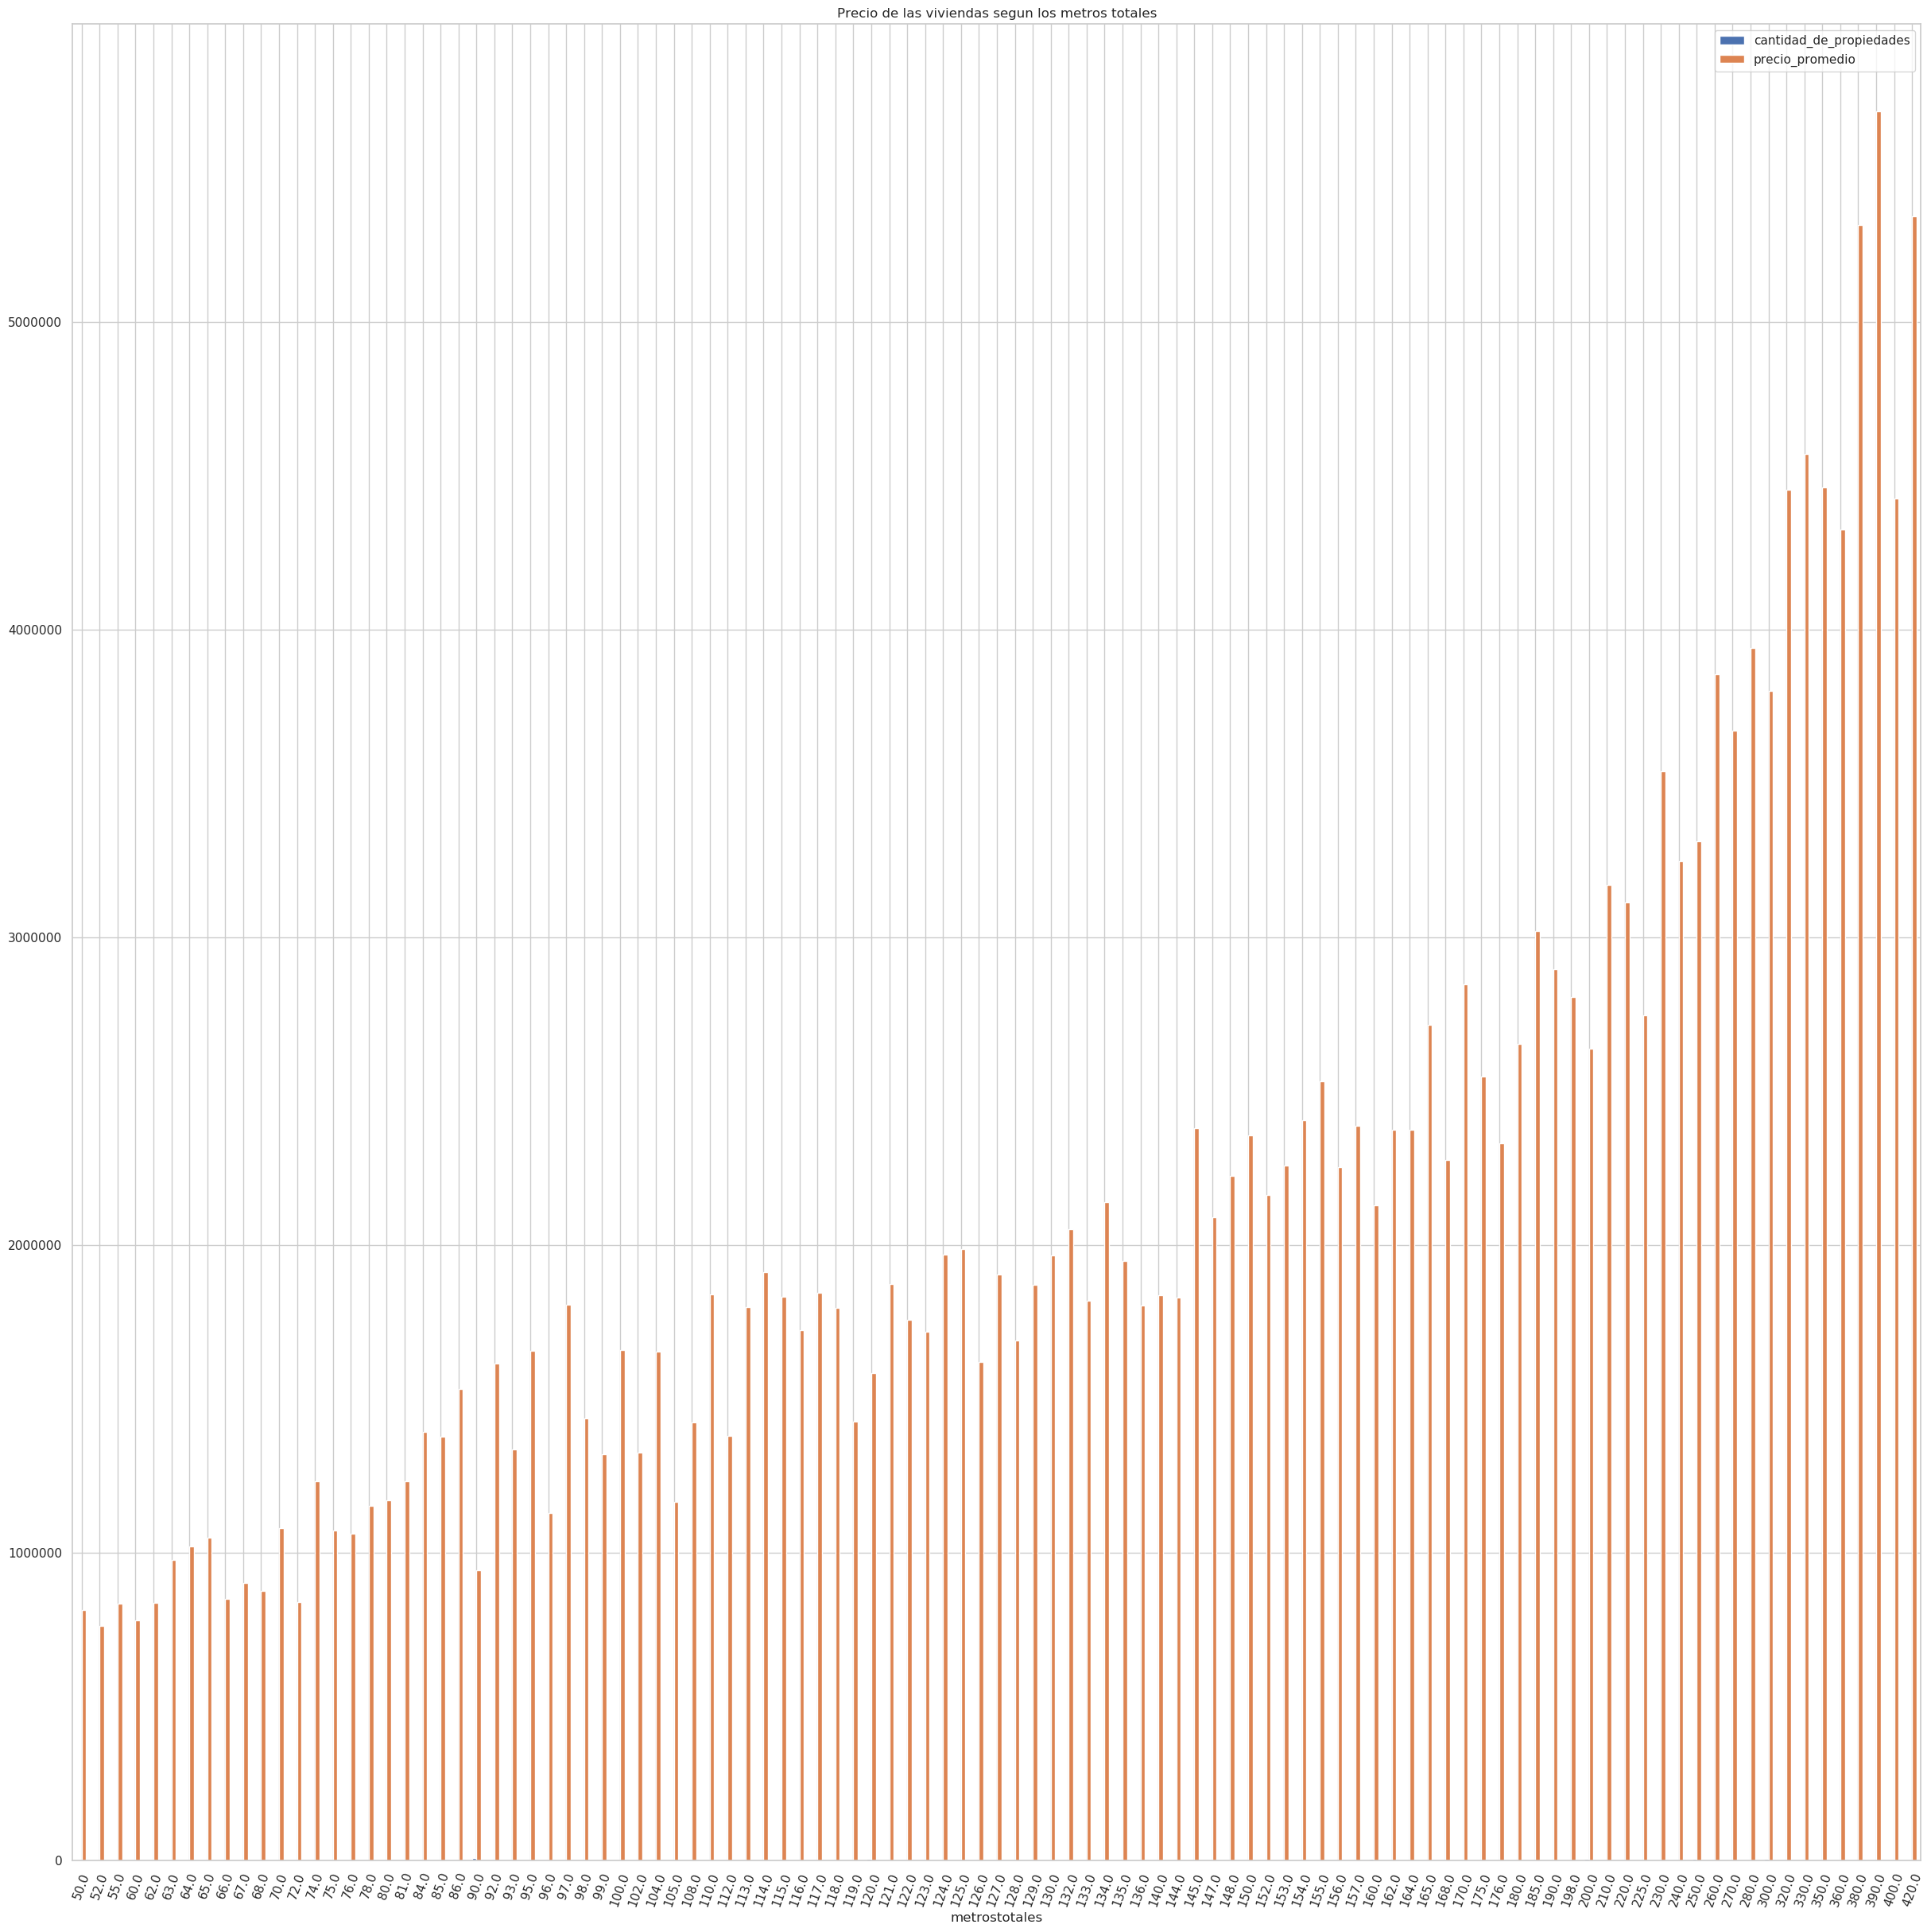

In [256]:
df_viviendas.plot(kind='bar', figsize=(30, 30), rot=70, 
                                       title="Precio de las viviendas segun los metros totales");
#df_viviendas.plot()
#Feo pero no hay nada mejor por ahora

---

**Precio de los comercios según sus metros totales**

In [257]:
#comercios = ['Local Comercial','Oficina comercial','Bodega comercial','Terreno comercial'] 
#Faltaría el "local en centro comercial"

df_comercios = df.loc[df.tipodepropiedad.isin(comercios)].groupby('metrostotales')['precio']\
.agg(['size','mean'])

df_comercios.columns = ['cantidad_de_propiedades','precio_promedio']
df_comercios = df_comercios.loc[(df_comercios.cantidad_de_propiedades>50)] #cambiar el numero para filtrar
df_comercios.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
metrostotales,,
300.00,203,"2,857,700.07"
400.00,143,"2,749,530.04"
180.00,71,"2,724,811.27"
250.00,152,"2,614,734.34"
240.00,54,"2,591,147.50"
200.00,222,"2,515,813.65"
120.00,70,"2,245,955.27"
60.00,61,"1,996,309.10"
100.00,64,"1,965,181.25"


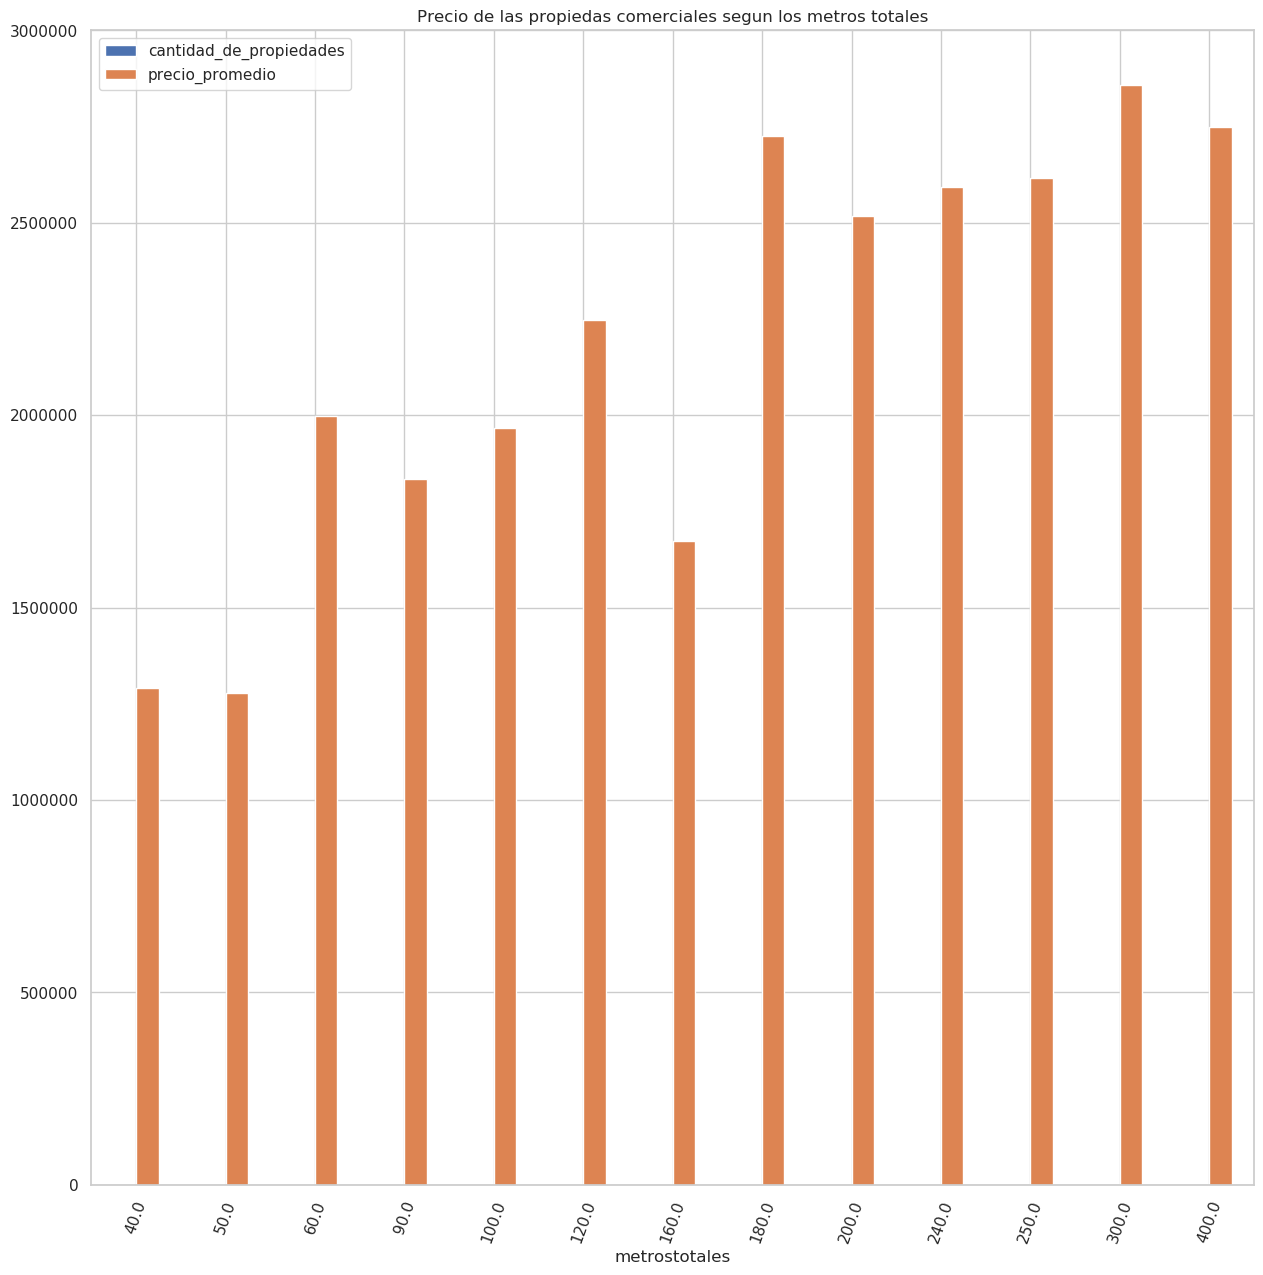

In [258]:
df_comercios.plot(kind='bar', figsize=(15, 15), rot=70, 
                                       title="Precio de las propiedas comerciales segun los metros totales");

---

**Precio de los edificios industriales según sus metros totales**

In [259]:
#industrias = ['Inmuebles productivos urbanos', 'Nave industrial','Terreno industrial','Casa uso de suelo']

df_industrias = df.loc[df.tipodepropiedad.isin(industrias)].groupby('metrostotales')['precio']\
.agg(['size','mean'])

df_industrias.columns = ['cantidad_de_propiedades','precio_promedio']
df_industrias = df_industrias.loc[(df_industrias.cantidad_de_propiedades>5)] #cambiar el numero para filtrar
df_industrias.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
metrostotales,,
275.00,6,"6,399,166.67"
385.00,7,"4,784,000.00"
360.00,10,"4,688,000.00"
420.00,6,"4,640,833.33"
225.00,6,"4,640,000.00"
300.00,35,"4,583,954.86"
240.00,18,"4,573,333.33"
350.00,10,"4,365,000.00"
270.00,6,"4,071,666.67"


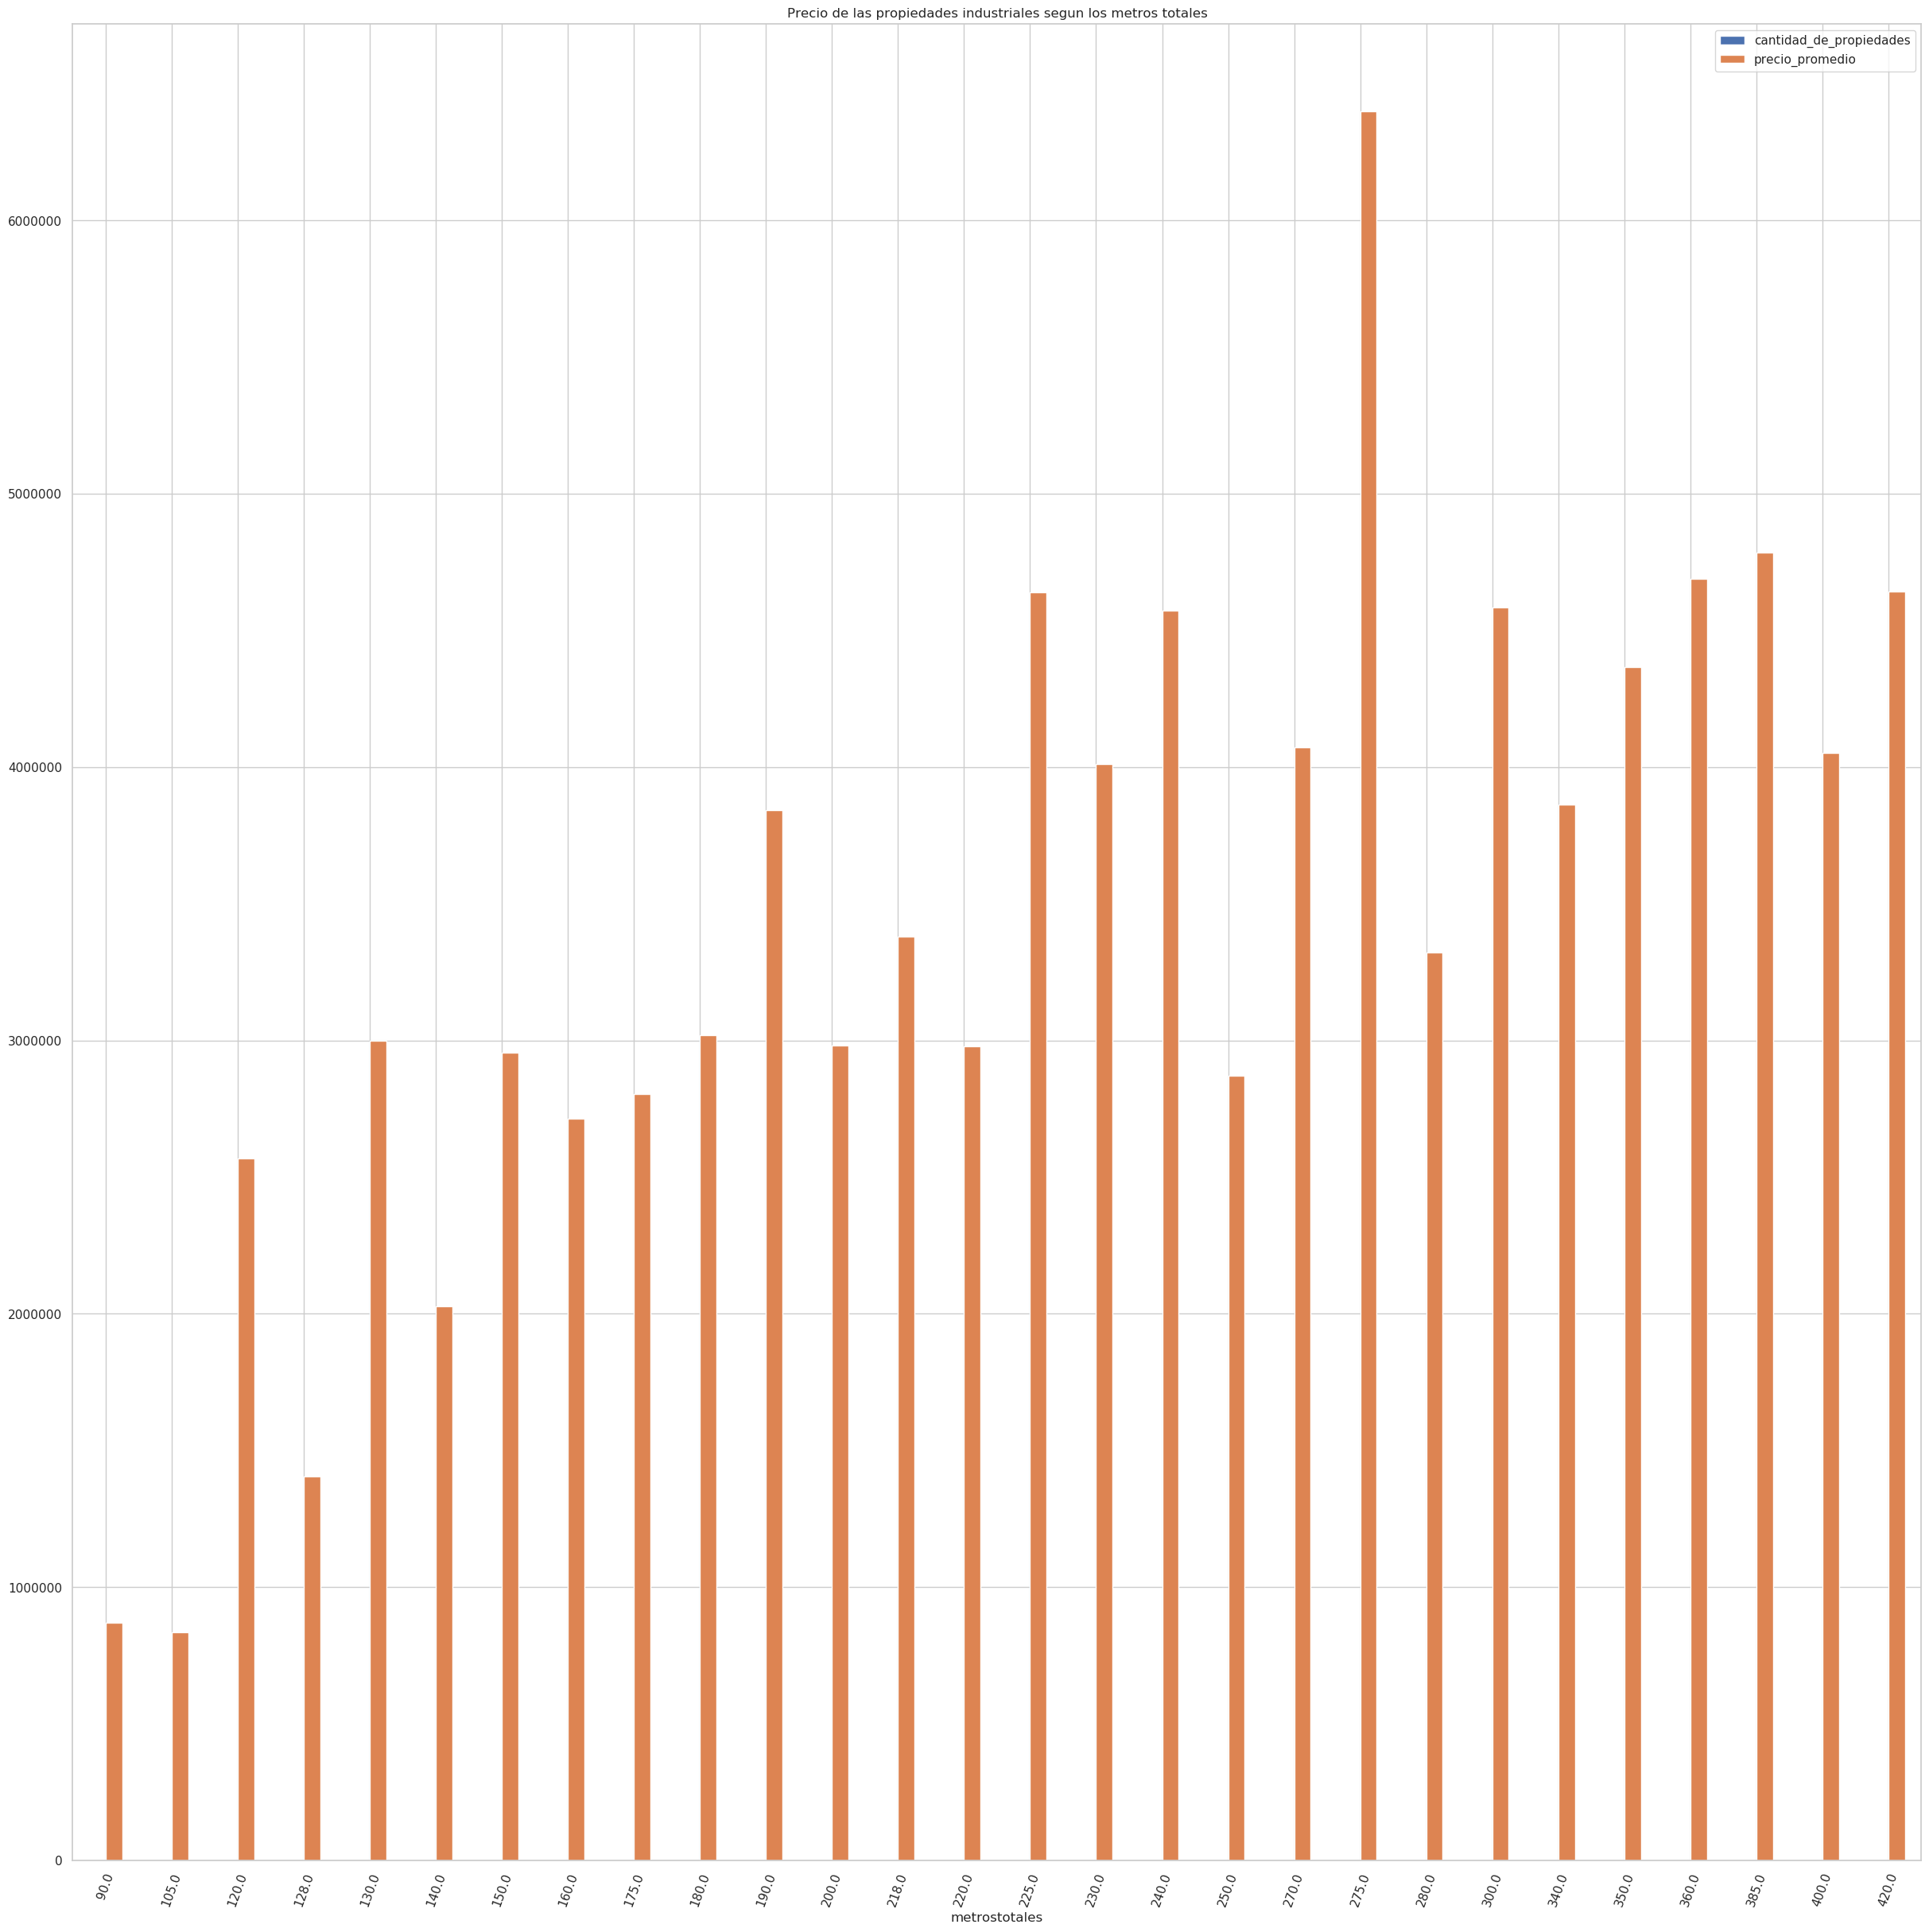

In [260]:
df_industrias.plot(kind='bar', figsize=(30, 30), rot=70, 
                                       title="Precio de las propiedades industriales segun los metros totales");

### 4.5 Análisis de propiedades

Analizaremos algunas caracteristicas sobre las propiedades, estas no dependen de su ubicación pero tal vez podriamos ubicarla en la sección 4.3. Empezaremos con ver cuales son las propiedades con más espacio de todas las opciones que tenemos

In [261]:
espacio_de_propiedades = df.groupby('tipodepropiedad')['metrostotales'].agg(['size','sum','mean'])
espacio_de_propiedades.columns = ['cantidad_de_propiedades','metros_sum','metros_promedio']
espacio_de_propiedades.sort_values('metros_promedio', ascending=False)

,cantidad_de_propiedades,metros_sum,metros_promedio
tipodepropiedad,,,
Nave industrial,76,"12,785.00",284.11
Terreno industrial,31,"4,252.00",283.47
Terreno comercial,1326,"284,332.00",268.24
Lote,5,"1,319.00",263.80
Bodega comercial,1406,"297,570.00",261.72
Terreno,9945,"2,269,266.00",261.59
Inmuebles productivos urbanos,200,"36,207.00",239.78
Edificio,1396,"289,095.00",231.46
Casa uso de suelo,708,"136,827.00",228.43


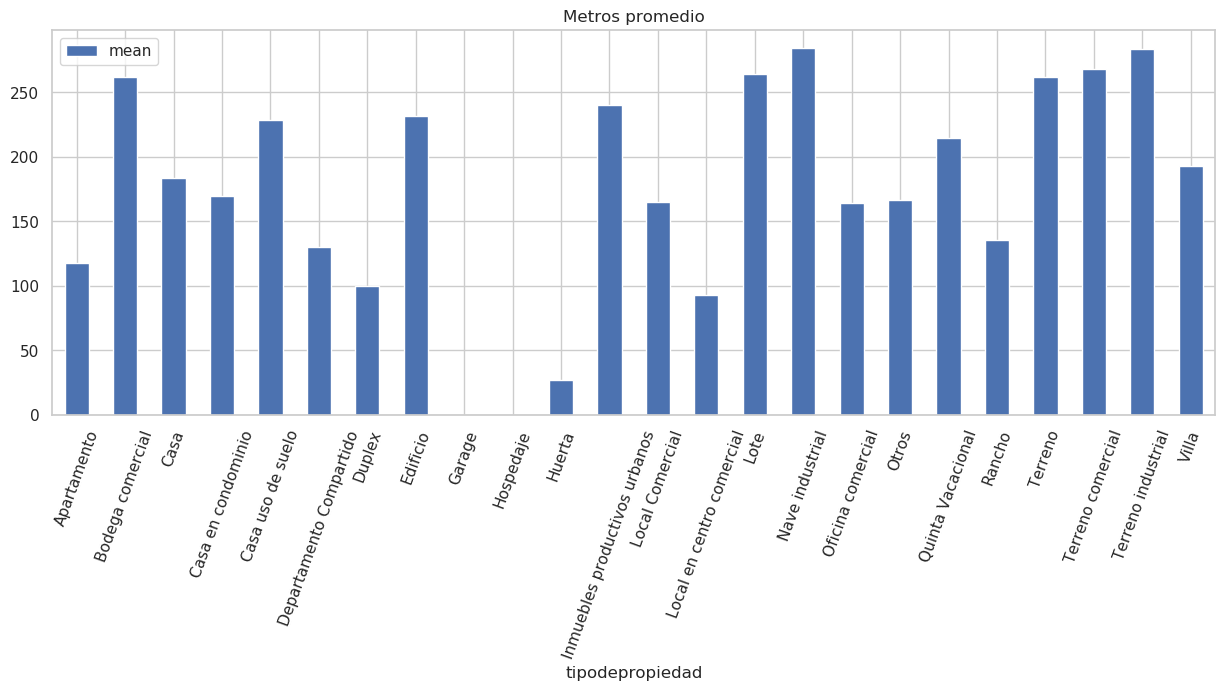

In [262]:
dfaux = df.groupby('tipodepropiedad')['metrostotales'].agg(['mean'])
dfaux.plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Metros promedio");
#me gustaria ordenarlo de mayor a menor pero no
#se si asi es mejor

Vemos que logicamente, los almacenes industriales son los mas espaciosos, no parece un analisis muy fructífero, así que ahora analizamos los casos por secciones como hicimos antes, empezaremos con las viviendas

**Espacio de las viviendas**

In [263]:
#viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Casa uso de suelo','Departamento Compartido','Hospedaje']

df_viviendas = df.loc[df.tipodepropiedad.isin(viviendas)].groupby('tipodepropiedad')\
.agg({'metrostotales': ['size', 'sum', 'mean']})

df_viviendas.columns = ['cantidad_de_propiedades', 'metros_totales','tamanio_promedio']
df_viviendas = df_viviendas.loc[(df_viviendas.cantidad_de_propiedades>100)] #cambiar el numero para filtrar
df_viviendas.sort_values('tamanio_promedio', ascending=False)

,cantidad_de_propiedades,metros_totales,tamanio_promedio
tipodepropiedad,,,
Quinta Vacacional,395,"10,503.00",214.35
Casa,141717,"22,982,196.00",183.77
Casa en condominio,19297,"2,910,507.00",169.73
Departamento Compartido,141,"13,171.00",130.41
Apartamento,57341,"3,460,357.00",117.91
Duplex,343,"31,890.00",100.28


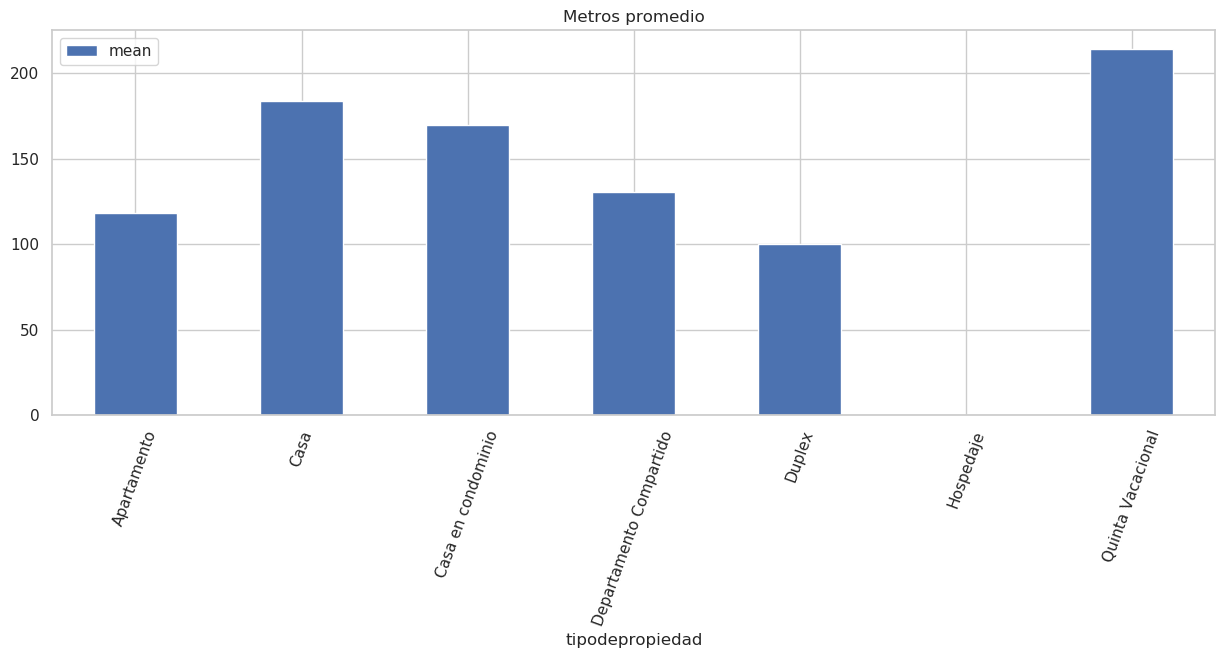

In [264]:
dfaux = df.loc[df.tipodepropiedad.isin(viviendas)].groupby('tipodepropiedad')['metrostotales'].agg(['mean'])
dfaux.plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Metros promedio"); #estoy podrido de los graficos de barra pero son los 
#mas faciles de hacer D:

---

**Espacio de los comercios**

In [265]:
df_comercios = df.loc[df.tipodepropiedad.isin(comercios)].groupby('tipodepropiedad')\
.agg({'metrostotales': ['size', 'sum', 'mean']})

df_comercios.columns = ['cantidad_de_propiedades', 'metros_totales','tamanio_promedio']
df_comercios = df_comercios.loc[(df_comercios.cantidad_de_propiedades>0)] #cambiar el numero para filtrar
df_comercios.sort_values('tamanio_promedio', ascending=False)

,cantidad_de_propiedades,metros_totales,tamanio_promedio
tipodepropiedad,,,
Terreno comercial,1326,"284,332.00",268.24
Bodega comercial,1406,"297,570.00",261.72
Local Comercial,3055,"364,394.00",165.26
Oficina comercial,1741,"157,592.00",163.99


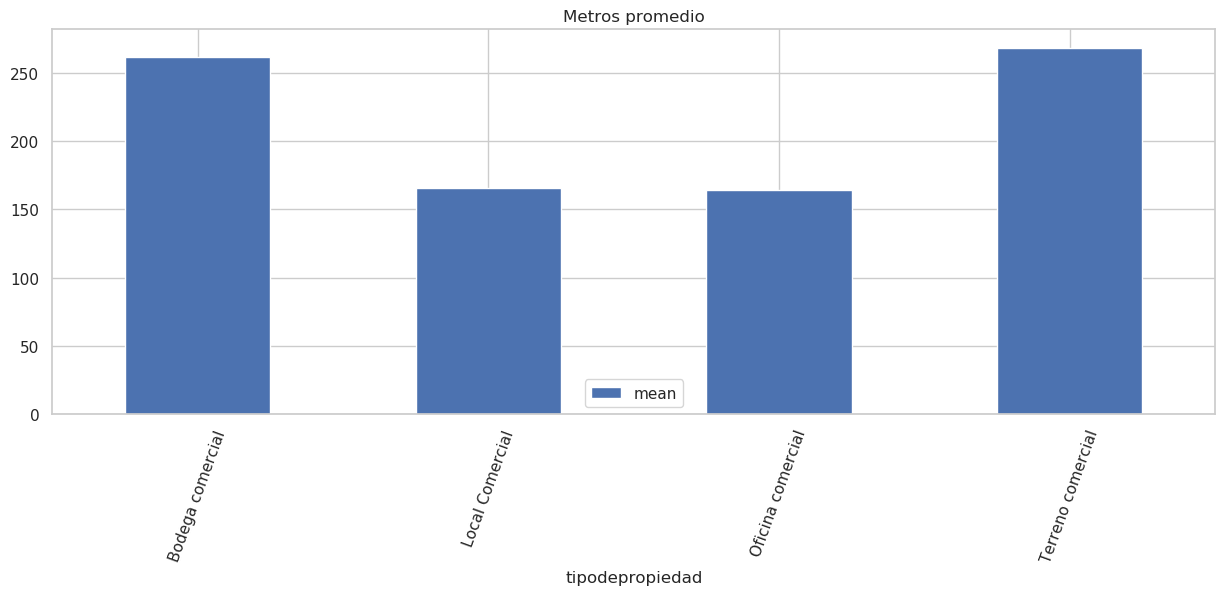

In [266]:
dfaux = df.loc[df.tipodepropiedad.isin(comercios)].groupby('tipodepropiedad')['metrostotales'].agg(['mean'])
dfaux.plot(kind='bar', figsize=(15, 5), rot=70, title="Metros promedio");

---

**Espacio de los edificios industriales**

In [267]:
df_industrias = df.loc[df.tipodepropiedad.isin(industrias)].groupby('tipodepropiedad')\
.agg({'metrostotales': ['size', 'sum', 'mean']})

df_industrias.columns = ['cantidad_de_propiedades', 'metros_totales','tamanio_promedio']
df_industrias = df_industrias.loc[(df_industrias.cantidad_de_propiedades>10)] #cambiar el numero para filtrar
df_industrias.sort_values('tamanio_promedio', ascending=False)

,cantidad_de_propiedades,metros_totales,tamanio_promedio
tipodepropiedad,,,
Nave industrial,76,"12,785.00",284.11
Terreno industrial,31,"4,252.00",283.47
Inmuebles productivos urbanos,200,"36,207.00",239.78
Casa uso de suelo,708,"136,827.00",228.43


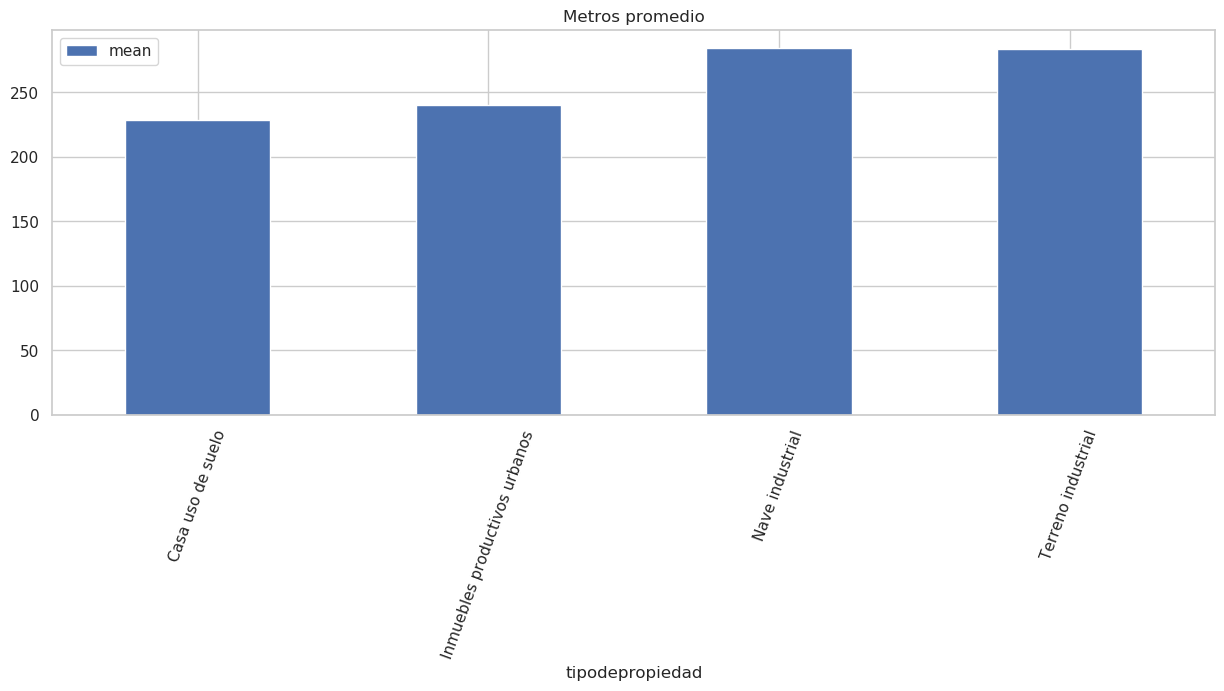

In [268]:
dfaux = df.loc[df.tipodepropiedad.isin(industrias)].groupby('tipodepropiedad')['metrostotales'].agg(['mean'])
dfaux.plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Metros promedio");

## Analisis de las fechas?

Deberiamos hacer analisis utilizando las fechas, ya sea cual es la propiedad con mas tiempo "en venta" o la mas reciente o cosas asi

In [269]:
df2 = df.loc[df.fecha <'2015-08-23 00:00:00'] #Habría que convertir la fecha a tipo datetime?
df2.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,"23,650.00",19.30,-99.15,2014-03-18 00:00:00,0.00,0.00,0.00,0.00,1.00,"1,100,000.00"
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,...,"9,010.00",nan,nan,2014-01-06 00:00:00,0.00,0.00,0.00,1.00,1.00,"310,000.00"
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.00,3.00,1.00,...,"87,542.00",22.20,-101.02,2013-01-03 00:00:00,0.00,0.00,0.00,1.00,1.00,"488,000.00"


## Analisis de latitud y longitud y como afecta al precio

Esto deberia estar mas arriba pero como no esta terminado, bue

In [270]:
#Tomas: aca pongo el analisis de la propiedad basado en los usos multiples. No se muy bien donde ponerlo, hay que
#ver bien donde ubicarlo

###  analisis de usos multiples







se analiza cuales valores puede tomar, y cuántos hay de cada uno

In [271]:
df.loc[:,'usosmultiples'].value_counts()

0.00    226778
1.00     13222
Name: usosmultiples, dtype: int64

se analiza cuales son las provincias que tienen la mayor cantidad de propiedades con uso múltiple

In [272]:
#provincias que más propiedades con usos multiples tiene
provincias_mas_usosmultiples=df.groupby('provincia')
dicc_provincias_usosmultiples={}
dicc_provincias_sinusosmultiples={}

for provincia, fila in provincias_mas_usosmultiples:
    dicc_provincias_usosmultiples[provincia]=0
    dicc_provincias_sinusosmultiples[provincia]=0
    for tieneusosmultiples in fila.loc[:,'usosmultiples']:
        if tieneusosmultiples==0.00:
            dicc_provincias_sinusosmultiples[provincia]+=1
        else:
            dicc_provincias_usosmultiples[provincia]+=1
#esto es para mostrar la informacion
df_usosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_usosmultiples.items()))
df_usosmultiples_porprovincia.columns=['Provincia','propiedades con usos multiples']
df_usosmultiples_porprovincia=df_usosmultiples_porprovincia.sort_values('propiedades con usos multiples',ascending=False)

df_usosmultiples_porprovincia.head(5)

,Provincia,propiedades con usos multiples
8,Distrito Federal,4044
10,Edo. de México,3060
14,Jalisco,1807
21,Querétaro,1154
20,Puebla,742


Vemos cuáles son las provincias que menos propiedades con usos múltiples tienen

In [273]:
df_usosmultiples_porprovincia.tail(5)

,Provincia,propiedades con usos multiples
2,Baja California Sur,5
27,Tamaulipas,4
28,Tlaxcala,3
31,Zacatecas,3
3,Campeche,1


De la misma manera vemos cuáles son las provincias que poseen la mayor cantidad de propiedades sin usos múltiples


In [274]:
df_sinusosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_sinusosmultiples.items()))
df_sinusosmultiples_porprovincia.columns=['Provincia','propiedades sin usos multiples']
df_sinusosmultiples_porprovincia=df_sinusosmultiples_porprovincia.sort_values('propiedades sin usos multiples',ascending=False)
df_sinusosmultiples_porprovincia.head(5)

,Provincia,propiedades sin usos multiples
8,Distrito Federal,54746
10,Edo. de México,38547
14,Jalisco,19431
21,Querétaro,15834
18,Nuevo León,14902


Las provincias con menor cantidad de propiedades sin usos múltiples son:

In [275]:
df_sinusosmultiples_porprovincia.tail(5)

,Provincia,propiedades sin usos multiples
26,Tabasco,981
28,Tlaxcala,836
19,Oaxaca,705
3,Campeche,262
31,Zacatecas,91


In [276]:
***************************HASTA ACA LLEGUÉ****************************************

SyntaxError: invalid syntax (<ipython-input-276-3326e2fb49e7>, line 1)

In [ ]:
df.nlargest(5, ['precio','metrostotales'])
#Curiosamente las 5 más caras pertenecen al distrito federal, con razón es la más cara


Veamos las 5 propiedades más caras y con más metros 

In [ ]:
#ciudades = df['ciudad']
#ciudades.value_counts()

In [ ]:
df.isnull().sum()
df.dropna(subset=['titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia','antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','idzona','lat','lng'])\
.isnull().sum() #elimino los nulos, habiamos discutido si lo hacemos o no

In [ ]:
df.memory_usage() #deriamos castear datos para que ocupen menos espacio

In [ ]:
#df.astype({'gimnasio': 'category','usosmultiples': 'category','piscina': 'category','escuelascercanas': 'int32','centroscomercialescercanos': 'int32'}).dtypes


In [ ]:
#df.dtypes

In [ ]:
df.info()
#deberiamos castear datos

In [ ]:
(df.memory_usage()/(1024*1024)).sum()

In [ ]:
df.describe()

In [ ]:
#df.plot.bar('habitaciones','precio') congela la computadora


#Hacer grafico


#print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
#df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70,mtitle="Cantidad de propiedades por tipo de propiedad");

In [ ]:
df.groupby('precio').agg({'antiguedad':'sum'})
#no sirve para nada ojo!!!!
#el primero elemento tiene 1400 años de antiguedad, raro

In [ ]:
df3 = df.loc[df.antiguedad > 100.00]
#40233830
df3.head() #arriba aparece pero aca no, doble raro

In [ ]:
# agrupando usando multiples columnas
grouped = df.groupby(['provincia','ciudad'])\
    .agg({'habitaciones':['mean','sum'],'precio':'mean', 'antiguedad':'mean'}) #poner parametros mas
                                                            #interesantes que habitaciones y antiguedad
grouped

In [ ]:
df2 = df.loc[df.tipodepropiedad == 'Apartamento']
df2.info()

In [ ]:
df2.shape

In [ ]:
#relacion entre latitud y longitud con el precio

In [ ]:
#comparacion entre el precio de las casas y los departamentos

In [ ]:
#

In [ ]:
# analicemos distribución de avisos por tipo de trabajo
workday_announcements = sns.countplot(x='tipodepropiedad', data=df, order=df['tipodepropiedad'].value_counts().index, orient='v')
workday_announcements.set_xticklabels(workday_announcements.get_xticklabels(),rotation=45)
workday_announcements.set_xlabel("Tipo de propiedades", fontsize=20)
workday_announcements.set_ylabel("Cantidad de Propiedades", fontsize=20)
workday_announcements.set_title("Cantidad de propiedades segun su clase", fontsize=20)

#Es un buen comienzo(?)

In [ ]:
# analicemos distribución de avisos por seniority

#seniority_types = sns.countplot(x='ciudad', data=df, order=df['ciudad'].value_counts().index, orient='v')
#seniority_types.set_xticklabels(seniority_types.get_xticklabels(),rotation=45)
#seniority_types.set_xlabel("Ciudades", fontsize=20)
#seniority_types.set_ylabel("Cantidad de propiedades por ciudad", fontsize=20)
#seniority_types.set_title("Propiedades por ciudad", fontsize=20)

#Horrible

In [ ]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);


In [ ]:
# comparacion de dos (o mas) campos con elementos faltantes
#funciones a usar:


#funcion para conseguir los numeros de las filas que tienen el campo especificado en la columna con un NaN
#devuelve una lista con las posiciones
#para que funcione bien, tiene que usar la clave por default del dataFrame. si se usa una clave compuesta
#o una clave que no sea enteros crecientes falla

def obtener_filas_con_Nan(df, nombreColumna):
    serie=df.loc[:,nombreColumna]
    serie=serie.isnull()
    lista_posiciones_nulas=[]
    contador=0
    for booleano in serie:
        if booleano is True:
            lista_posiciones_nulas.append(contador)
        contador+=1
    return lista_posiciones_nulas


def concatenarListasSinDuplicados(lista1,lista2):
    dicc={}
    for item in lista1:
        dicc[item]=1
    for item in lista2:
        dicc[item]=1
    return dicc.keys()

In [ ]:
lista_id_faltantes=obtener_filas_con_Nan(df,'id')
print(lista_id_faltantes)

###  analisis de usos multiples







se analiza cuales valores puede tomar, y cuántos hay de cada uno

In [ ]:
df.loc[:,'usosmultiples'].value_counts()

se analiza cuales son las provincias que tienen la mayor cantidad de propiedades con uso múltiple

In [ ]:
#provincias que más propiedades con usos multiples tiene
provincias_mas_usosmultiples=df.groupby('provincia')
dicc_provincias_usosmultiples={}
dicc_provincias_sinusosmultiples={}

for provincia, fila in provincias_mas_usosmultiples:
    dicc_provincias_usosmultiples[provincia]=0
    dicc_provincias_sinusosmultiples[provincia]=0
    for tieneusosmultiples in fila.loc[:,'usosmultiples']:
        if tieneusosmultiples==0.00:
            dicc_provincias_sinusosmultiples[provincia]+=1
        else:
            dicc_provincias_usosmultiples[provincia]+=1
#esto es para mostrar la informacion
df_usosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_usosmultiples.items()))
df_usosmultiples_porprovincia.columns=['Provincia','propiedades con usos multiples']
df_usosmultiples_porprovincia=df_usosmultiples_porprovincia.sort_values('propiedades con usos multiples',ascending=False)

df_usosmultiples_porprovincia.head(5)

Vemos cuáles son las provincias que menos propiedades con usos múltiples tienen

In [ ]:
df_usosmultiples_porprovincia.tail(5)

De la misma manera vemos cuáles son las provincias que poseen la mayor cantidad de propiedades sin usos múltiples


In [ ]:
df_sinusosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_sinusosmultiples.items()))
df_sinusosmultiples_porprovincia.columns=['Provincia','propiedades sin usos multiples']
df_sinusosmultiples_porprovincia=df_sinusosmultiples_porprovincia.sort_values('propiedades sin usos multiples',ascending=False)
df_sinusosmultiples_porprovincia.head(5)

Las provincias con menor cantidad de propiedades sin usos múltiples son:

In [ ]:
df_sinusosmultiples_porprovincia.tail(5)

## habiendo analizado la data, vemos como afecta la misma al precio de las propiedades

análisis de la variacion de precios en base a si la propiedad tiene o no usos multiples


In [ ]:
#comparación de los precios de las propiedades básados exclusivamente en si la propiedad tiene o no usos multiples
df_usosmultiples=df.groupby('usosmultiples').agg({'precio':['max','min','mean']})
df_usosmultiples.columns=['precio máximo','precio mínimo','precio promedio']
df_usosmultiples

In [ ]:
#comparacion de los precios promedios de propiedades con y sin usos múltiples, basado en la provincia
df_precio_usosmultiples_provincia=df.groupby(['usosmultiples','provincia']).agg({'precio':'mean'})
df_precio_usosmultiples_provincia.columns=['precio promedio']
df_precio_usosmultiples_provincia
#ahora falta plotear un grafico con estos valores

### Quiero ver cuáles son las provincias que tienen mayor precio para propiedades sin usos multiples

In [ ]:
provinciasMasCarasSinUsosMultiples=df_precio_usosmultiples_provincia.loc[0.0]
provinciasMasCarasSinUsosMultiples=provinciasMasCarasSinUsosMultiples.sort_values('precio promedio',ascending=False)
provinciasMasCarasSinUsosMultiples.columns=['precio promedio propiedad sin usos multiples']
provinciasMasCarasSinUsosMultiples.head(5)

### Quiero ver cuáles son las provincias que tienen menor precio para propiedades sin usos mutiples

In [ ]:
provinciasMasCarasSinUsosMultiples.tail(5)

### Queremos ver cuáles son las provincias que tienen mayor precio para propiedades con usos múltiples

In [ ]:
provinciasMasCarasConUsosMutiples=df_precio_usosmultiples_provincia.loc[1.00]
provinciasMasCarasConUsosMutiples=provinciasMasCarasConUsosMutiples.sort_values('precio promedio',ascending=False)
provinciasMasCarasConUsosMutiples.head(5)

### Queremos ver cuáles son las provincias que tienen menor precio para propiedades con usos múltiples


In [ ]:
provinciasMasCarasConUsosMutiples.tail(5)

### Efecto de usos multiples sobre el precio de propiedades de características similares

Queremos ver el efecto de si la propiedad tiene usos multiples en comparación con su precio, para propiedades de características similares. Para ello, se fija la propiedad y la cantidad de habitaciones, y se compara el promedio de los valores de ambos grupos (con uso multiple y sin uso multiple). Puede ocurrir que para alguna combinación de cantidad de habitaciones con ubicación, no se dispongan de datos suficientes para realizar la comparación. En tal caso la información obtenida reflejará esta situación, mostrando una variación del 0%


In [ ]:
df_variacion_precio_usos=df.groupby(['provincia','habitaciones','usosmultiples']).agg({'precio':'mean'})
df_variacion_precio_usos.index
indices_provincia=df_variacion_precio_usos.index.get_level_values(0)

#lo siguiente lo hice a mano, porque no esta implementada una forma de hacer join con multiindices en pandas

dicc={}

#consigo todas las provincias que se tienen que recorrer
indicesProvincias=df_variacion_precio_usos.index.get_level_values(0)
#recorro las provincias
for provincia in indicesProvincias:
    serieDentroDeProvincia=df_variacion_precio_usos.loc[provincia]
    indices_habitaciones=serieDentroDeProvincia.index.get_level_values(0)
    #recorro las habitaciones dentro de un grupo provincia específico
    for habitaciones in indices_habitaciones:
        serieDentroDeHabitaciones=serieDentroDeProvincia.loc[habitaciones]
        indices_usosMultiples=serieDentroDeHabitaciones.index.values
        lista_precios=[]
        for usosMultiples in indices_usosMultiples:
            lista_precios.append(serieDentroDeHabitaciones.loc[usosMultiples])
            
        #ahora que tengo todos los precios comparo 
        #si la longitud de la lista es igual a 1, significa que solamente habia un solo dato
        #para esas características
        
        if len(lista_precios)==1:
            dicc[(provincia,habitaciones)]=0
        else:
            #la comparación se hace respecto al precio sin uso multiple
            precioSinUso=float(lista_precios[0])
            precioConUso=float(lista_precios[1])
            diferencia=float(abs(precioSinUso-precioConUso))
            porcentajeVariacion=round(((diferencia/precioSinUso)*100),2)
            dicc[(provincia,habitaciones)]=porcentajeVariacion

            
#y ahora queda mostrar la info:
df_muestra=pd.DataFrame(list(dicc.items()))
df_muestra

Nos falta hacer:
Analisis precios por banios
Analisi precios por latitud y longitud (por ahi ultimo recurso)
Analisis de la cercania a escuelas/shoppings por cada provincia, ciudad
Comparacion de antiguedades para propiedades con las mismas caracteristicas


Analisis de datos:
-> por fecha de postulacion
-> por fechas 

-> por gimnasio
-> por ciudades
Faltan graficos de anàlisis anteriores
